In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
tenk_no_agg_deepcore = pd.read_parquet('/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/10000_events_simset_815_20250515_132757_no_aggregate.parquet')

tenk_agg_deepcore = pd.read_parquet('/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/final_out_100_events_1_to_100gev_simset_1619_seed_96_upgrade_omsim_new_muon_fixed_omap_20250611_104709_OMSim_tables_new_2D_muon_loss_fixed_hits.parquet')


In [5]:
tenk_no_agg = pd.read_parquet('/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/examples/output/50k_events_simset_711_20250514_020049.parquet')
tenk_no_agg

,mc_truth,photons
0,"{'interaction': 1, 'initial_state_energy': 52....","{'sensor_pos_x': [], 'sensor_pos_y': [], 'sens..."
1,"{'interaction': 1, 'initial_state_energy': 15....","{'sensor_pos_x': [194.34, 57.2, 248.15], 'sens..."
2,"{'interaction': 2, 'initial_state_energy': 28....","{'sensor_pos_x': [], 'sensor_pos_y': [], 'sens..."
3,"{'interaction': 2, 'initial_state_energy': 26....","{'sensor_pos_x': [330.03, 303.41], 'sensor_pos..."
4,"{'interaction': 2, 'initial_state_energy': 24....","{'sensor_pos_x': [], 'sensor_pos_y': [], 'sens..."
...,...,...
9995,"{'interaction': 1, 'initial_state_energy': 30....","{'sensor_pos_x': [-368.93, -245.65, -245.65, -..."
9996,"{'interaction': 1, 'initial_state_energy': 38....","{'sensor_pos_x': [114.39, 158.94, -43.27, -43...."
9997,"{'interaction': 1, 'initial_state_energy': 47....","{'sensor_pos_x': [-200.55], 'sensor_pos_y': [-..."
9998,"{'interaction': 1, 'initial_state_energy': 45....","{'sensor_pos_x': [46.29, 194.34, 113.19, 57.2,..."


In [4]:
n_hits_tenk_no_agg_deepcore = np.zeros(10000)
n_unique_hits_tenk_no_agg_deepcore = np.zeros(10000)


n_hits_tenk_tenk_no_agg= np.zeros(10000)
n_unique_hits_tenk_no_agg= np.zeros(10000)

n_hits_tenk_agg_deepcore = np.zeros(10000)
n_unique_hits_tenk_agg_deepcore = np.zeros(10000)
max_hits_idx = 0
for i in range(10000):
    n_hits_tenk_no_agg_deepcore[i] = len(tenk_no_agg_deepcore['photons'][i]['t'])
    n_unique_hits_tenk_no_agg_deepcore[i] = len(set(zip(tenk_no_agg_deepcore['photons'][i]['string_id'], tenk_no_agg_deepcore['photons'][i]['sensor_id'])))

    n_hits_tenk_tenk_no_agg[i] = len(tenk_no_agg['photons'][i]['t'])
    n_unique_hits_tenk_no_agg[i] = len(set(zip(tenk_no_agg['photons'][i]['string_id'], tenk_no_agg['photons'][i]['sensor_id'])))

    n_hits_tenk_agg_deepcore[i] = len(tenk_agg_deepcore['photons'][i]['t'])
    n_unique_hits_tenk_agg_deepcore[i] = len(set(zip(tenk_agg_deepcore['photons'][i]['string_id'], tenk_agg_deepcore['photons'][i]['sensor_id'])))

    if n_hits_tenk_tenk_no_agg[i] > max_hits_idx:
        max_hits_idx=i

In [5]:
max_hits_idx

1835

[]

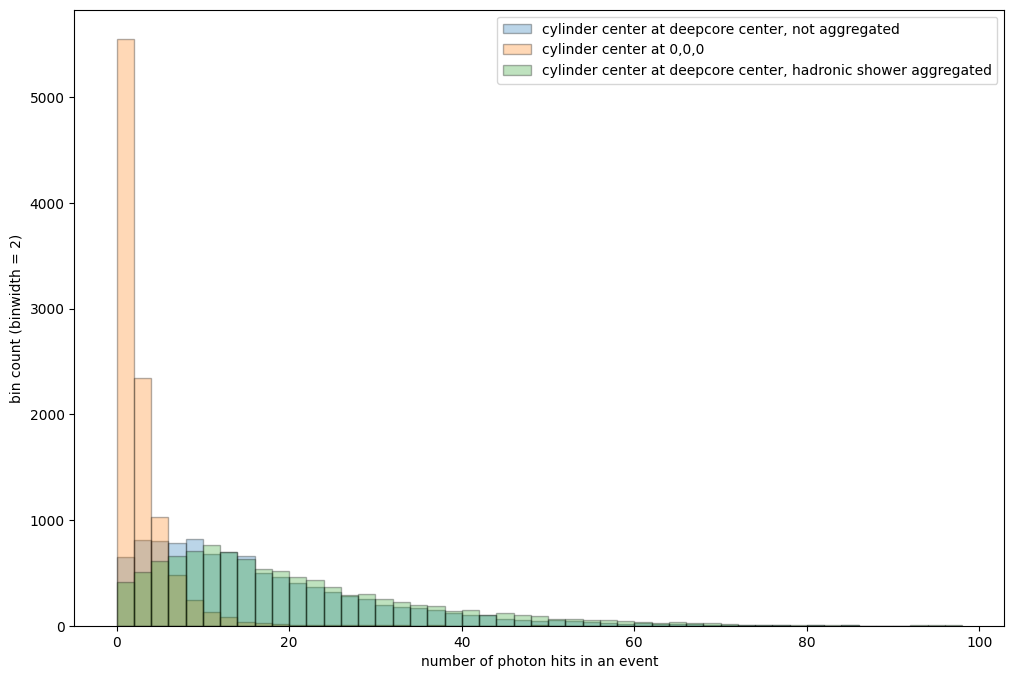

In [6]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated')
plt.hist(n_hits_tenk_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0')
plt.hist(n_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated')
plt.xlabel('number of photon hits in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

[]

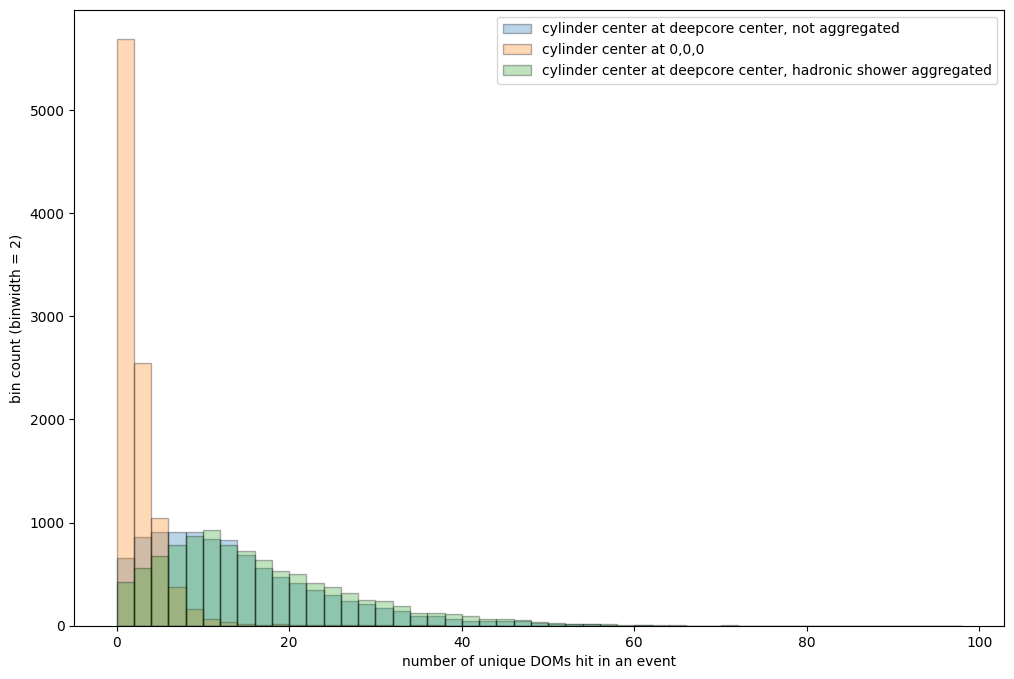

In [7]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_unique_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated')
plt.hist(n_unique_hits_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0')
plt.hist(n_unique_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated')
plt.xlabel('number of unique DOMs hit in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

In [8]:

n_hits_tenk_tenk_no_agg[max_hits_idx]

42.0

In [9]:
n_unique_hits_tenk_no_agg[max_hits_idx]

37.0

In [10]:
tenk_no_agg['photons'][max_hits_idx]

{'sensor_pos_x': array([ 124.97,    1.71,   -9.68,   31.25,   31.25,  106.94,   57.2 ,
          57.2 ,  113.19,   57.2 ,  124.97,   31.25,   72.37,  124.97,
         113.19,   57.2 ,   31.25,  -10.97,  -10.97,   57.2 ,  124.97,
         113.19,    1.71,  113.19,   57.2 ,   46.29,   31.25,   31.25,
         124.97,   31.25,   -9.68,   72.37,   57.2 ,    1.71,  124.97,
          31.25,   46.29,   57.2 ,  113.19,   72.37,  113.19, -121.77]),
 'sensor_pos_y': array([-131.25, -150.63,  -79.5 ,  -72.93,  -72.93,   27.09, -105.52,
        -105.52,  -60.47, -105.52, -131.25,  -72.93,  -66.6 , -131.25,
         -60.47, -105.52,  -72.93,    6.72,    6.72, -105.52, -131.25,
         -60.47, -150.63,  -60.47, -105.52,  -34.88,  -72.93,  -72.93,
        -131.25,  -72.93,  -79.5 ,  -66.6 , -105.52, -150.63, -131.25,
         -72.93,  -34.88, -105.52,  -60.47,  -66.6 ,  -60.47, -171.03]),
 'sensor_pos_z': array([-2322.47, -2267.81, -2321.75, -2324.47, -2338.48, -2270.03,
        -2368.79, -2445.88, 

In [11]:
tenk_no_agg['photons'][max_hits_idx]

{'sensor_pos_x': array([ 124.97,    1.71,   -9.68,   31.25,   31.25,  106.94,   57.2 ,
          57.2 ,  113.19,   57.2 ,  124.97,   31.25,   72.37,  124.97,
         113.19,   57.2 ,   31.25,  -10.97,  -10.97,   57.2 ,  124.97,
         113.19,    1.71,  113.19,   57.2 ,   46.29,   31.25,   31.25,
         124.97,   31.25,   -9.68,   72.37,   57.2 ,    1.71,  124.97,
          31.25,   46.29,   57.2 ,  113.19,   72.37,  113.19, -121.77]),
 'sensor_pos_y': array([-131.25, -150.63,  -79.5 ,  -72.93,  -72.93,   27.09, -105.52,
        -105.52,  -60.47, -105.52, -131.25,  -72.93,  -66.6 , -131.25,
         -60.47, -105.52,  -72.93,    6.72,    6.72, -105.52, -131.25,
         -60.47, -150.63,  -60.47, -105.52,  -34.88,  -72.93,  -72.93,
        -131.25,  -72.93,  -79.5 ,  -66.6 , -105.52, -150.63, -131.25,
         -72.93,  -34.88, -105.52,  -60.47,  -66.6 ,  -60.47, -171.03]),
 'sensor_pos_z': array([-2322.47, -2267.81, -2321.75, -2324.47, -2338.48, -2270.03,
        -2368.79, -2445.88, 

[]

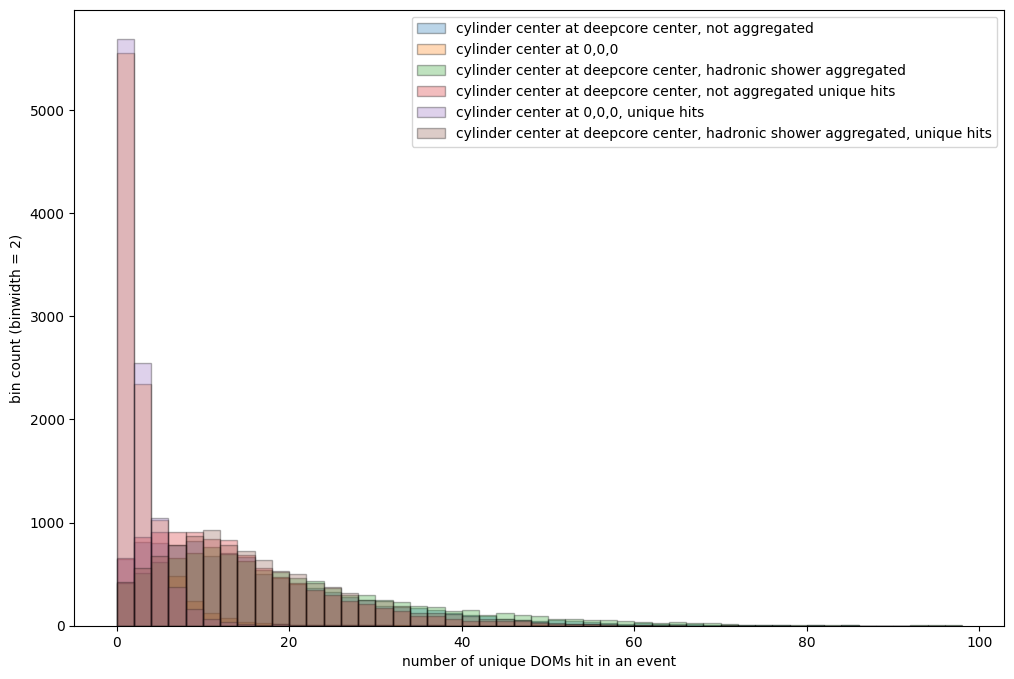

In [12]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated')
plt.hist(n_hits_tenk_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0')
plt.hist(n_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated')
plt.xlabel('number of photon hits in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.hist(n_unique_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated unique hits')
plt.hist(n_unique_hits_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0, unique hits')
plt.hist(n_unique_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated, unique hits')
plt.xlabel('number of unique DOMs hit in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

[]

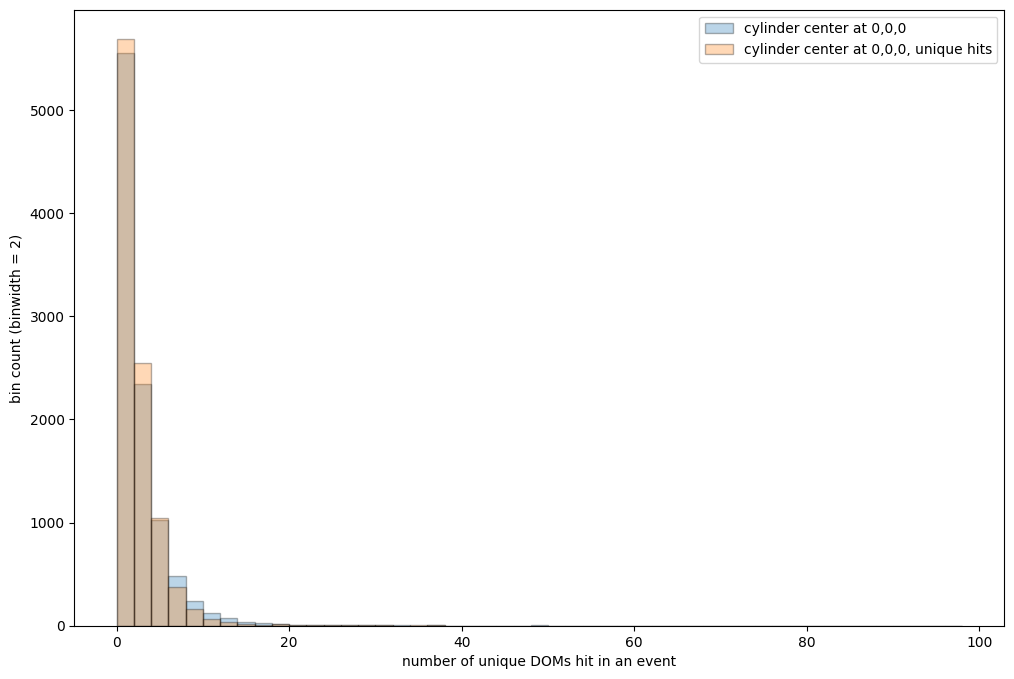

In [13]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
#plt.hist(n_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated')
plt.hist(n_hits_tenk_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0')
#plt.hist(n_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated')
plt.xlabel('number of photon hits in an event')
plt.ylabel('bin count (binwidth = 2)')
# plt.legend()

#plt.hist(n_unique_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated unique hits')
plt.hist(n_unique_hits_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0, unique hits')
#plt.hist(n_unique_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated, unique hits')
plt.xlabel('number of unique DOMs hit in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

[]

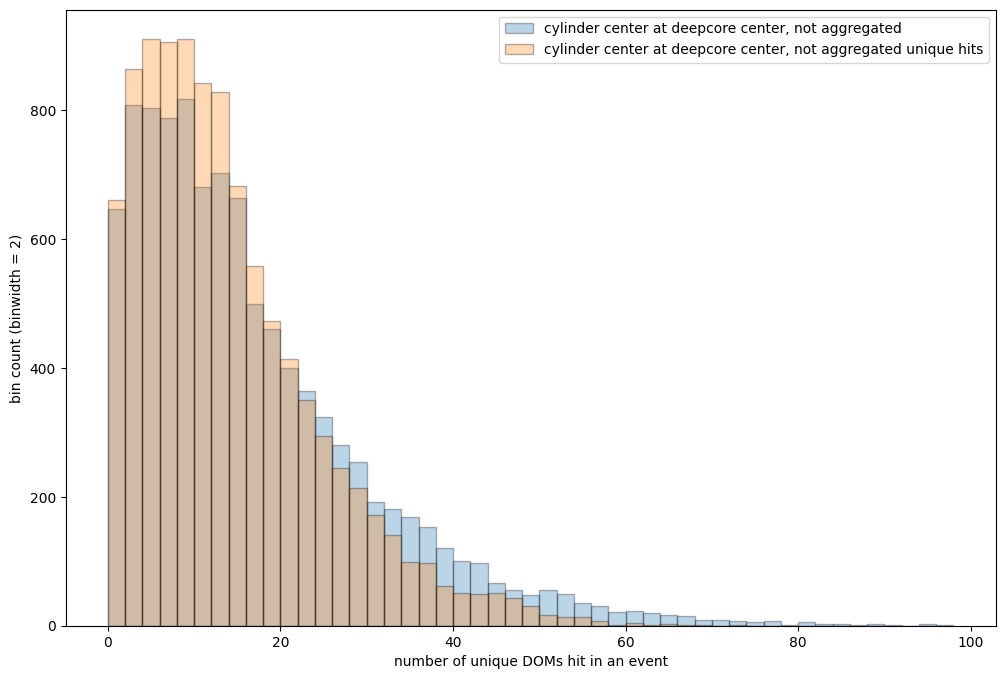

In [14]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated')
#plt.hist(n_hits_tenk_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0')
#plt.hist(n_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated')
plt.xlabel('number of photon hits in an event')
plt.ylabel('bin count (binwidth = 2)')
# plt.legend()

plt.hist(n_unique_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated unique hits')
#plt.hist(n_unique_hits_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0, unique hits')
#plt.hist(n_unique_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated, unique hits')
plt.xlabel('number of unique DOMs hit in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

[]

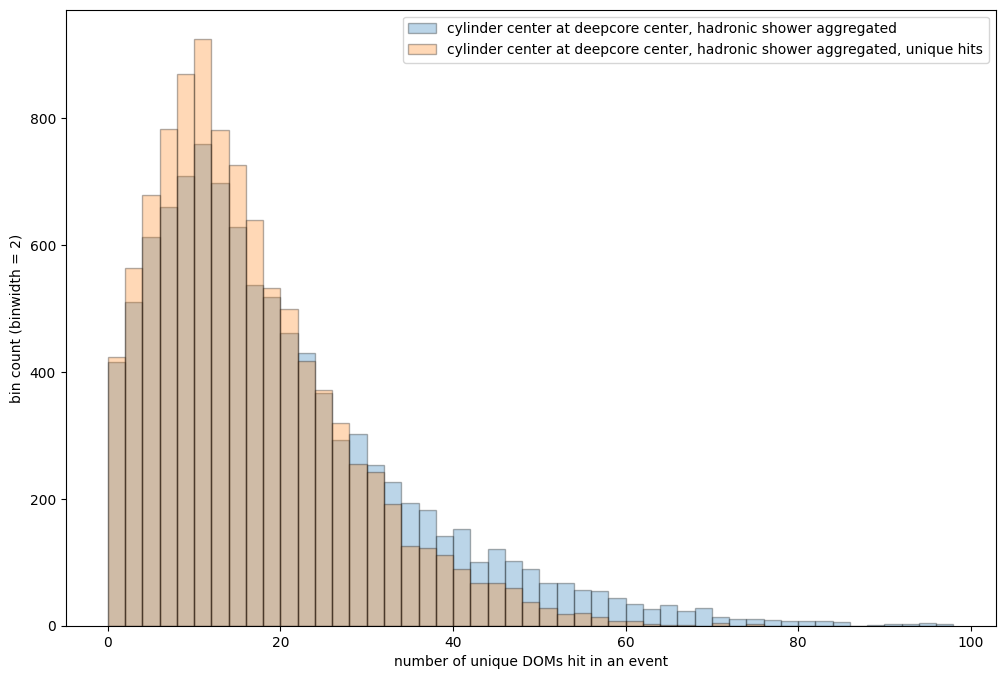

In [15]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
#plt.hist(n_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated')
#plt.hist(n_hits_tenk_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0')
plt.hist(n_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated')
plt.xlabel('number of photon hits in an event')
plt.ylabel('bin count (binwidth = 2)')
# plt.legend()

#plt.hist(n_unique_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated unique hits')
#plt.hist(n_unique_hits_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0, unique hits')
plt.hist(n_unique_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated, unique hits')
plt.xlabel('number of unique DOMs hit in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

[]

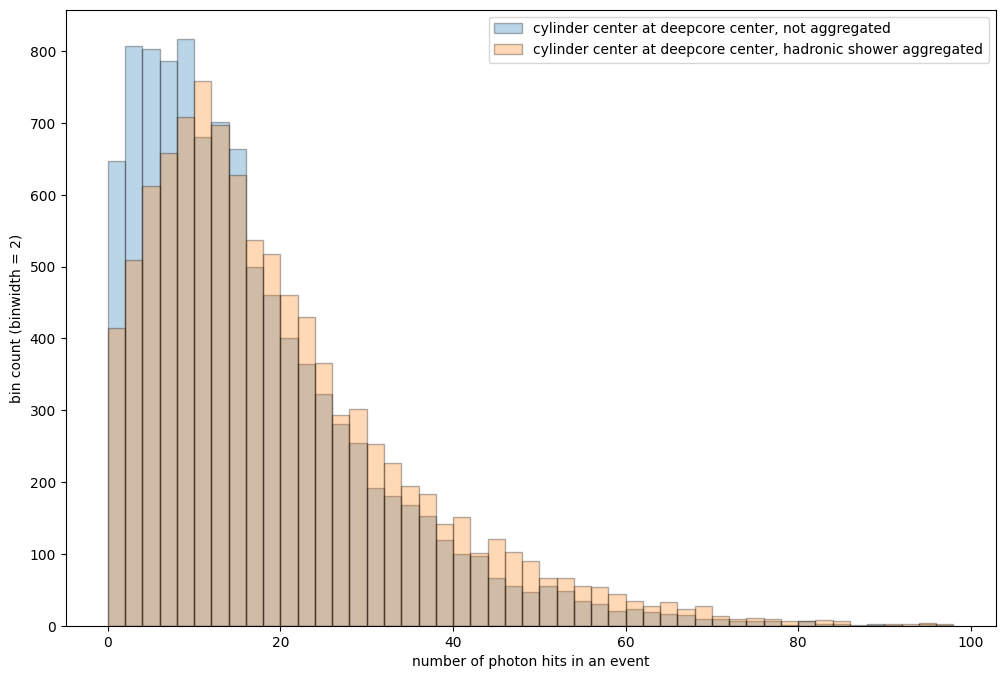

In [16]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated')
#plt.hist(n_hits_tenk_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0')
plt.hist(n_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated')
plt.xlabel('number of photon hits in an event')
plt.ylabel('bin count (binwidth = 2)')
# plt.legend()

# plt.hist(n_unique_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated unique hits')
# #plt.hist(n_unique_hits_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0, unique hits')
# plt.hist(n_unique_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated, unique hits')
# plt.xlabel('number of unique DOMs hit in an event')
# plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

In [17]:
num_unique_doms = len(set(zip(tenk_no_agg_deepcore['photons'][0]['string_id'], tenk_no_agg_deepcore['photons'][0]['sensor_id'])))
num_unique_doms

35

In [30]:
tenk_no_agg_deepcore['mc_truth'][5]

{'interaction': 1,
 'initial_state_energy': 41.15355212162106,
 'initial_state_type': 14,
 'initial_state_zenith': 0.7122092043519264,
 'initial_state_azimuth': -2.1409049761225494,
 'initial_state_x': 79.885228762352,
 'initial_state_y': -62.691946301121355,
 'initial_state_z': -2230.5475086739466,
 'final_state_energy': array([6.18000000e-03, 3.11266375e+01, 2.37495629e-02, 3.32631180e-02,
        4.86456936e-02, 8.10969051e+00, 1.51808547e+00, 2.47271920e-01,
        2.30582148e-01, 1.05636207e+00, 1.11188467e+00, 1.07664828e+00,
        2.27133659e-01, 2.14684145e-01]),
 'final_state_type': array([  22.,   13.,   11.,   14.,  -12.,  211., 2112., -211.,  111.,
        2112., 2212., 2212.,  211., -211.]),
 'final_state_zenith': array([0.77443434, 0.71715417, 0.65128105, 1.54567106, 1.98817972,
        0.5850514 , 0.68045662, 1.18916782, 1.5641756 , 1.08021806,
        0.95262351, 0.32950214, 1.33789825, 1.33549989]),
 'final_state_azimuth': array([-2.69988252, -2.21660138, -1.1298367

In [33]:
nc_idx = []
cc_idx = []
cc_idx_q = []
for i in range(10000):
    if tenk_no_agg_deepcore['mc_truth'][i]['interaction']==1:
        cc_idx.append(i)
    else:
        nc_idx.append(i)
    if tenk_no_agg_deepcore['mc_truth'][i]['interaction']==1:

In [35]:
len(cc_idx), len(nc_idx)

(7588, 2412)

In [44]:
tenk_no_agg_deepcore['mc_truth'][5]

{'interaction': 1,
 'initial_state_energy': 41.15355212162106,
 'initial_state_type': 14,
 'initial_state_zenith': 0.7122092043519264,
 'initial_state_azimuth': -2.1409049761225494,
 'initial_state_x': 79.885228762352,
 'initial_state_y': -62.691946301121355,
 'initial_state_z': -2230.5475086739466,
 'final_state_energy': array([6.18000000e-03, 3.11266375e+01, 2.37495629e-02, 3.32631180e-02,
        4.86456936e-02, 8.10969051e+00, 1.51808547e+00, 2.47271920e-01,
        2.30582148e-01, 1.05636207e+00, 1.11188467e+00, 1.07664828e+00,
        2.27133659e-01, 2.14684145e-01]),
 'final_state_type': array([  22.,   13.,   11.,   14.,  -12.,  211., 2112., -211.,  111.,
        2112., 2212., 2212.,  211., -211.]),
 'final_state_zenith': array([0.77443434, 0.71715417, 0.65128105, 1.54567106, 1.98817972,
        0.5850514 , 0.68045662, 1.18916782, 1.5641756 , 1.08021806,
        0.95262351, 0.32950214, 1.33789825, 1.33549989]),
 'final_state_azimuth': array([-2.69988252, -2.21660138, -1.1298367

In [76]:
print(len(tenk_no_agg_deepcore['mc_truth'][18]['final_state_type']))
print(tenk_no_agg_deepcore['mc_truth'][18]['final_state_type'])
tenk_no_agg_deepcore['mc_truth'][18]['final_state_energy']

16
[   13.    11.    14.   -12.  2212.   111. -2212.   211.  2212.  -211.
   111.  2212.   211.  2112.   211.  -211.]


array([13.69595486,  0.02416001,  0.04398909,  0.03750928, 12.0363106 ,
        1.54861978,  7.75894697, 16.94302345,  1.29085439,  0.30491974,
        0.51149672,  3.23955751,  0.82931078,  0.95442352,  0.69758896,
        0.7480541 ])

In [77]:
print(tenk_no_agg_deepcore['mc_truth'][18]['final_state_type'][0])

tenk_no_agg_deepcore['photons'][18]

13.0


{'sensor_pos_x': array([ 72.37, 106.94,  72.37,  72.37,  72.37,  31.25,  72.37, 113.19,
         57.2 ,  72.37, 113.19,  72.37,  72.37, 113.19,  72.37,  41.6 ,
         72.37,  31.25, -10.97,  72.37,  72.37,  72.37,  57.2 ,  46.29,
         57.2 , -10.97, 113.19,  31.25,  41.6 ,  31.25,  46.29,  72.37,
        113.19,  31.25,  72.37, 113.19,  72.37,  72.37,  72.37,  46.29,
        113.19,  72.37,  57.2 ,  41.6 ,  31.25,  41.6 ,  72.37,  72.37,
        -10.97,  -9.68,  31.25, 106.94]),
 'sensor_pos_y': array([ -66.6 ,   27.09,  -66.6 ,  -66.6 ,  -66.6 ,  -72.93,  -66.6 ,
         -60.47, -105.52,  -66.6 ,  -60.47,  -66.6 ,  -66.6 ,  -60.47,
         -66.6 ,   35.49,  -66.6 ,  -72.93,    6.72,  -66.6 ,  -66.6 ,
         -66.6 , -105.52,  -34.88, -105.52,    6.72,  -60.47,  -72.93,
          35.49,  -72.93,  -34.88,  -66.6 ,  -60.47,  -72.93,  -66.6 ,
         -60.47,  -66.6 ,  -66.6 ,  -66.6 ,  -34.88,  -60.47,  -66.6 ,
        -105.52,   35.49,  -72.93,   35.49,  -66.6 ,  -66.6 ,    6.7

In [83]:
tenk_no_agg_deepcore['photons'][0]['id_idx']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 6])

In [88]:
l = tenk_no_agg_deepcore['photons'][0]['id_idx']
for idx in l:
    print(tenk_no_agg_deepcore['mc_truth'][0]['final_state_type'][idx-1])

13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
2112.0


In [87]:
tenk_no_agg_deepcore['mc_truth'][0]['final_state_type']

array([  13.,   11.,   14.,  -12.,  111., 2112., 2112.,  211.,  111.,
       2112., 2212.,  211., -211.])

In [89]:
tenk_no_agg_deepcore['mc_truth'][0]['final_state_energy']

array([4.55051801e+01, 3.29933062e-02, 3.99437638e-02, 3.27213044e-02,
       4.08309359e+00, 1.09807943e+00, 9.88114394e-01, 1.51005869e+00,
       4.33928096e-01, 1.23503895e+00, 1.01236585e+00, 2.92767458e-01,
       2.08485134e-01])

In [92]:
ls = []
for cc_i in cc_idx:

    id_idx = tenk_no_agg_deepcore['photons'][cc_i]['id_idx']
    for idx in id_idx:
        ls.append(tenk_no_agg_deepcore['mc_truth'][cc_i]['final_state_type'][idx-1])
    

In [99]:
ls = []
cc_i
id_idx = tenk_no_agg_deepcore['photons'][cc_i]['id_idx']
for idx in id_idx:
    ls.append(tenk_no_agg_deepcore['mc_truth'][cc_i]['final_state_type'][idx-1])
    

In [100]:
ls

[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 2212.0, 2212.0]

In [102]:
tenk_no_agg_deepcore['photons'][0]['id_idx']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 6])

In [103]:
tenk_no_agg_deepcore['mc_truth'][0]['final_state_type']

array([  13.,   11.,   14.,  -12.,  111., 2112., 2112.,  211.,  111.,
       2112., 2212.,  211., -211.])

In [37]:
tenk_no_agg_deepcore['photons'][cc_idx]

0       {'sensor_pos_x': [-9.68, 31.25, 57.2, 57.2, 57...
1       {'sensor_pos_x': [31.25, -10.97, -9.68, -9.68,...
5       {'sensor_pos_x': [72.37, 46.29, 57.2, 106.94, ...
6       {'sensor_pos_x': [-10.97, -10.97, -9.68, 41.6,...
7       {'sensor_pos_x': [113.19, -9.68, 113.19, 113.1...
                              ...                        
9995    {'sensor_pos_x': [57.2, 31.25, 1.71, -9.68, 31...
9996    {'sensor_pos_x': [46.29, 113.19, 31.25, -10.97...
9997    {'sensor_pos_x': [57.2, 57.2, 72.37, -9.68, 72...
9998    {'sensor_pos_x': [31.25, 31.25, 57.2, 31.25, 7...
9999    {'sensor_pos_x': [57.2, 124.97, 57.2, 72.37, 3...
Name: photons, Length: 7588, dtype: object

In [18]:
tenk_no_agg_deepcore = pd.read_parquet('/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/10000_events_simset_815_20250515_132757_no_aggregate.parquet')

tenk_agg_deepcore = pd.read_parquet('/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/10000_events_simset_813_20250515_132629_aggregate.parquet')


In [104]:
# First, get CC and NC events
nc_idx = []
cc_idx = []
for i in range(10000):
    if tenk_no_agg_deepcore['mc_truth'][i]['interaction'] == 1:
        cc_idx.append(i)
    else:
        nc_idx.append(i)

# Now add a 'particle_type' field to the photons structure
for i in range(10000):
    # Get the id_idx for all photons in this event
    id_idx_array = tenk_no_agg_deepcore['photons'][i]['id_idx']
    
    # Get the final_state_type array for this event
    final_state_types = tenk_no_agg_deepcore['mc_truth'][i]['final_state_type']
    
    # Create new array to store the particle types
    # Using the id_idx (with -1 adjustment) to map to final_state_type
    particle_types = np.array([final_state_types[idx-1] for idx in id_idx_array])
    
    # Add this as a new field to the photons structure
    tenk_no_agg_deepcore['photons'][i]['particle_type'] = particle_types

In [105]:
tenk_no_agg_deepcore['photons'][0]

{'sensor_pos_x': array([  -9.68,   31.25,   57.2 ,   57.2 ,   57.2 ,   57.2 ,   57.2 ,
          72.37,  124.97,   31.25,   57.2 ,   57.2 ,   57.2 ,   72.37,
         113.19,   57.2 ,   57.2 ,   57.2 ,   57.2 ,   57.2 ,   57.2 ,
          57.2 ,   -9.68,   57.2 ,   72.37,   -9.68,   -9.68,   -9.68,
          -9.68,   31.25,   57.2 ,  -77.8 ,   -9.68,   -9.68,  -77.8 ,
          46.29,   -9.68,  -43.27,   -9.68,   -9.68,   31.25,   46.29,
          31.25,   -9.68,   -9.68, -166.4 ,   -9.68,   -9.68,    1.71,
          72.37]),
 'sensor_pos_y': array([ -79.5 ,  -72.93, -105.52, -105.52, -105.52, -105.52, -105.52,
         -66.6 , -131.25,  -72.93, -105.52, -105.52, -105.52,  -66.6 ,
         -60.47, -105.52, -105.52, -105.52, -105.52, -105.52, -105.52,
        -105.52,  -79.5 , -105.52,  -66.6 ,  -79.5 ,  -79.5 ,  -79.5 ,
         -79.5 ,  -72.93, -105.52,  -54.33,  -79.5 ,  -79.5 ,  -54.33,
         -34.88,  -79.5 , -267.52,  -79.5 ,  -79.5 ,  -72.93,  -34.88,
         -72.93,  -79.5 , 

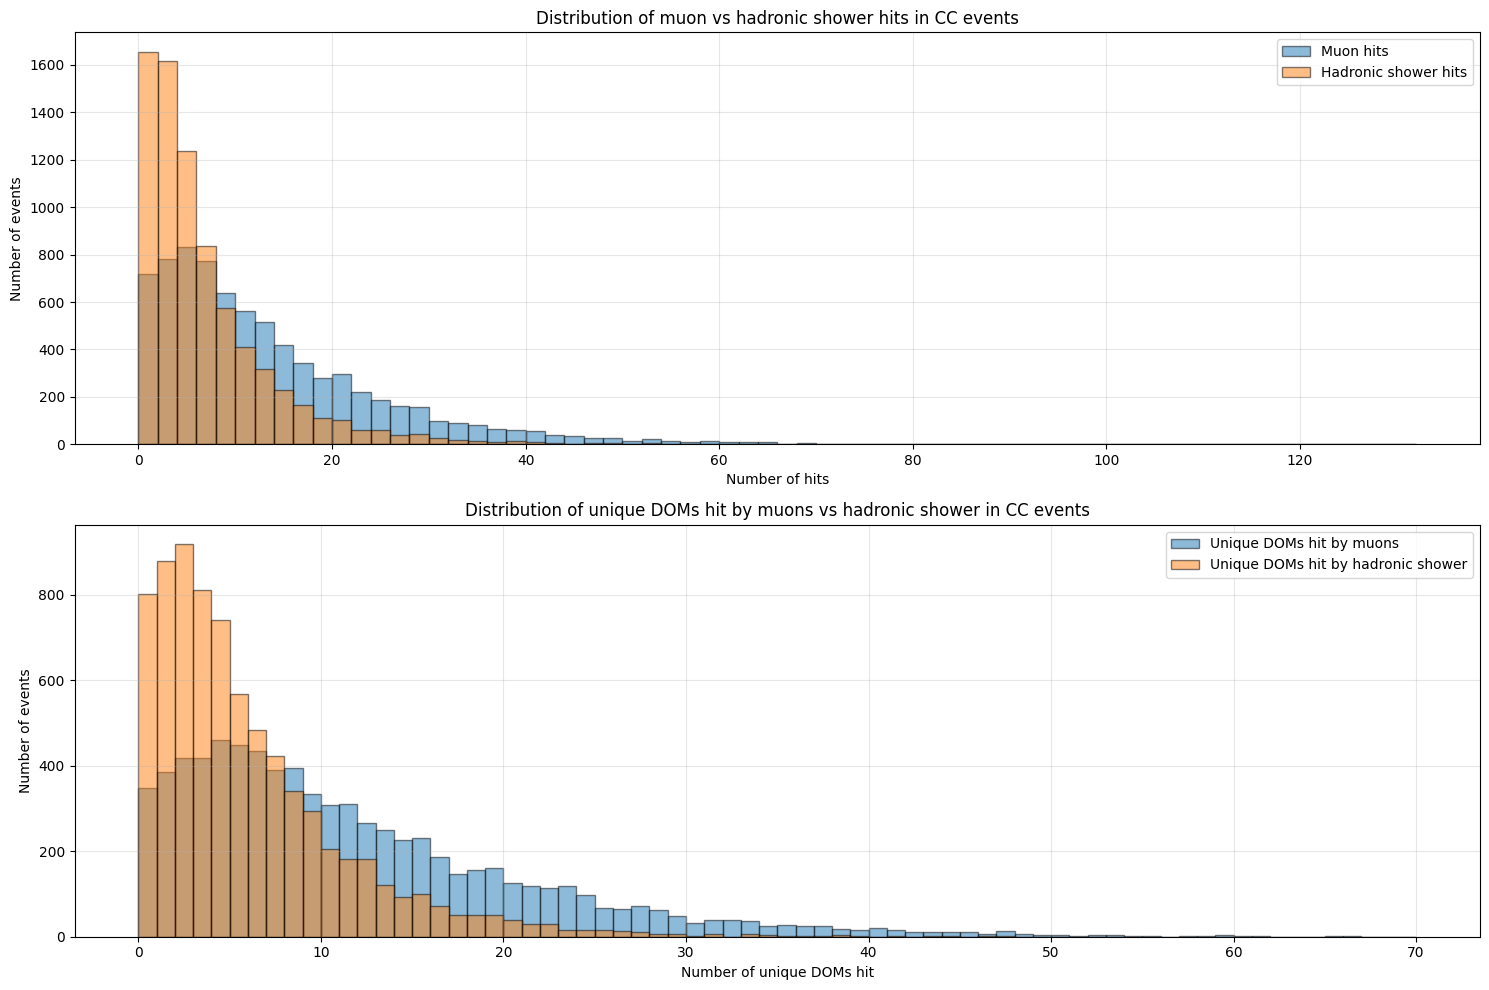

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays to store hit counts
muon_hits_per_event = np.zeros(len(cc_idx))
hadron_hits_per_event = np.zeros(len(cc_idx))

# Arrays to store unique DOM hit counts
unique_muon_doms_per_event = np.zeros(len(cc_idx))
unique_hadron_doms_per_event = np.zeros(len(cc_idx))

# Process each CC event
for i, event_idx in enumerate(cc_idx):
    # Get particle types for all hits in this event
    particle_types = tenk_no_agg_deepcore['photons'][event_idx]['particle_type']
    
    # Identify muon hits and hadronic shower hits
    muon_mask = (particle_types == 13)
    hadron_mask = (particle_types != 13)
    
    # Count total hits
    muon_hits_per_event[i] = np.sum(muon_mask)
    hadron_hits_per_event[i] = np.sum(hadron_mask)
    
    # For unique DOM counts, we need string_id and sensor_id
    string_ids = tenk_no_agg_deepcore['photons'][event_idx]['string_id']
    sensor_ids = tenk_no_agg_deepcore['photons'][event_idx]['sensor_id']
    
    # Get unique DOMs hit by muons
    if np.any(muon_mask):
        muon_strings = string_ids[muon_mask]
        muon_sensors = sensor_ids[muon_mask]
        unique_muon_doms_per_event[i] = len(set(zip(muon_strings, muon_sensors)))
    
    # Get unique DOMs hit by hadronic shower
    if np.any(hadron_mask):
        hadron_strings = string_ids[hadron_mask]
        hadron_sensors = sensor_ids[hadron_mask]
        unique_hadron_doms_per_event[i] = len(set(zip(hadron_strings, hadron_sensors)))

# Create histograms
plt.figure(figsize=(15, 10))

# Plot 1: Total hits distribution
plt.subplot(2, 1, 1)
bins = np.arange(0, max(np.max(muon_hits_per_event), np.max(hadron_hits_per_event)) + 10, 2)
plt.hist(muon_hits_per_event, bins=bins, alpha=0.5, label='Muon hits', edgecolor='black')
plt.hist(hadron_hits_per_event, bins=bins, alpha=0.5, label='Hadronic shower hits', edgecolor='black')
plt.xlabel('Number of hits')
plt.ylabel('Number of events')
plt.title('Distribution of muon vs hadronic shower hits in CC events')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Unique DOMs hit distribution
plt.subplot(2, 1, 2)
bins = np.arange(0, max(np.max(unique_muon_doms_per_event), np.max(unique_hadron_doms_per_event)) + 5, 1)
plt.hist(unique_muon_doms_per_event, bins=bins, alpha=0.5, label='Unique DOMs hit by muons', edgecolor='black')
plt.hist(unique_hadron_doms_per_event, bins=bins, alpha=0.5, label='Unique DOMs hit by hadronic shower', edgecolor='black')
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Number of events')
plt.title('Distribution of unique DOMs hit by muons vs hadronic shower in CC events')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

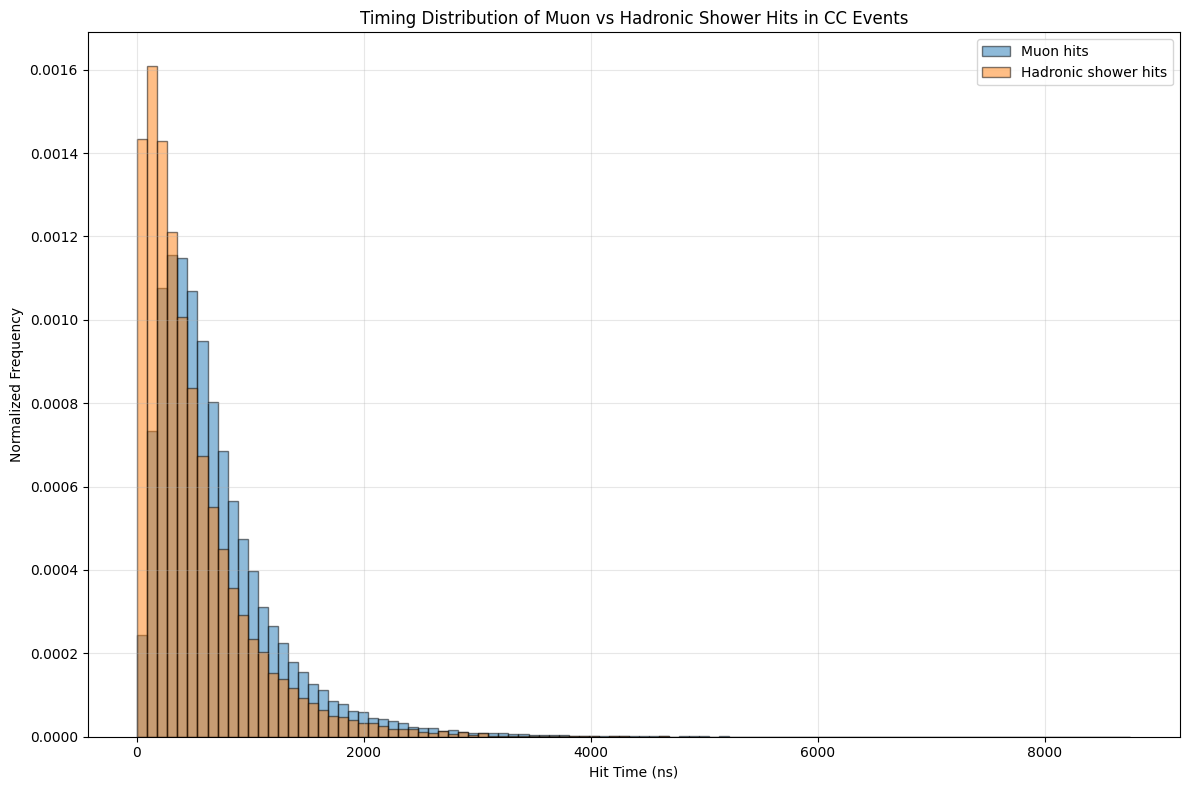

Muon hits statistics:
  Count: 99061
  Mean time: 700.74 ns
  Median time: 557.06 ns
  Min time: 6.95 ns
  Max time: 8755.87 ns

Hadronic shower hits statistics:
  Count: 49596
  Mean time: 505.47 ns
  Median time: 358.27 ns
  Min time: 6.69 ns
  Max time: 7064.33 ns


In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays to collect all hit times
all_muon_hit_times = []
all_hadron_hit_times = []

# Process each CC event
for event_idx in cc_idx:
    # Get particle types and times for all hits in this event
    particle_types = tenk_no_agg_deepcore['photons'][event_idx]['particle_type']
    hit_times = tenk_no_agg_deepcore['photons'][event_idx]['t']
    
    # Identify muon hits and hadronic shower hits
    muon_mask = (particle_types == 13)
    hadron_mask = (particle_types != 13)
    
    # Collect hit times
    muon_times = hit_times[muon_mask]
    hadron_times = hit_times[hadron_mask]
    
    # Append to our collection arrays
    all_muon_hit_times.extend(muon_times)
    all_hadron_hit_times.extend(hadron_times)

# Convert to numpy arrays for histogram plotting
all_muon_hit_times = np.array(all_muon_hit_times)
all_hadron_hit_times = np.array(all_hadron_hit_times)

# Create the timing histogram
plt.figure(figsize=(12, 8))

# Determine bin range covering both distributions
min_time = min(np.min(all_muon_hit_times) if len(all_muon_hit_times) > 0 else 0, 
               np.min(all_hadron_hit_times) if len(all_hadron_hit_times) > 0 else 0)
max_time = max(np.max(all_muon_hit_times) if len(all_muon_hit_times) > 0 else 3000, 
               np.max(all_hadron_hit_times) if len(all_hadron_hit_times) > 0 else 3000)

# Create logarithmically spaced bins for better visualization
# This works well for timing data that often spans multiple orders of magnitude
bins = np.linspace(min_time, max_time, 100)  # Linear bins
# Alternative: bins = np.logspace(np.log10(max(1, min_time)), np.log10(max_time), 100)  # Log bins

# Plot histograms
plt.hist(all_muon_hit_times, bins=bins, alpha=0.5, label='Muon hits', edgecolor='black', density=True)
plt.hist(all_hadron_hit_times, bins=bins, alpha=0.5, label='Hadronic shower hits', edgecolor='black', density=True)

plt.xlabel('Hit Time (ns)')
plt.ylabel('Normalized Frequency')
plt.title('Timing Distribution of Muon vs Hadronic Shower Hits in CC Events')
plt.legend()
plt.grid(alpha=0.3)

# Optional: Add a log scale on y-axis to see details in the tails
# plt.yscale('log')

plt.tight_layout()
plt.show()

# Print some statistics about the timing distributions
print(f"Muon hits statistics:")
print(f"  Count: {len(all_muon_hit_times)}")
print(f"  Mean time: {np.mean(all_muon_hit_times):.2f} ns")
print(f"  Median time: {np.median(all_muon_hit_times):.2f} ns")
print(f"  Min time: {np.min(all_muon_hit_times):.2f} ns")
print(f"  Max time: {np.max(all_muon_hit_times):.2f} ns")

print(f"\nHadronic shower hits statistics:")
print(f"  Count: {len(all_hadron_hit_times)}")
print(f"  Mean time: {np.mean(all_hadron_hit_times):.2f} ns")
print(f"  Median time: {np.median(all_hadron_hit_times):.2f} ns")
print(f"  Min time: {np.min(all_hadron_hit_times):.2f} ns")
print(f"  Max time: {np.max(all_hadron_hit_times):.2f} ns")

CC Events (7588 events):
  Mean hits: 19.59
  Median hits: 16.00
  Mean unique DOMs: 16.21
  Median unique DOMs: 14.00

NC Events (2412 events):
  Mean hits: 6.13
  Median hits: 4.00
  Mean unique DOMs: 5.19
  Median unique DOMs: 4.00


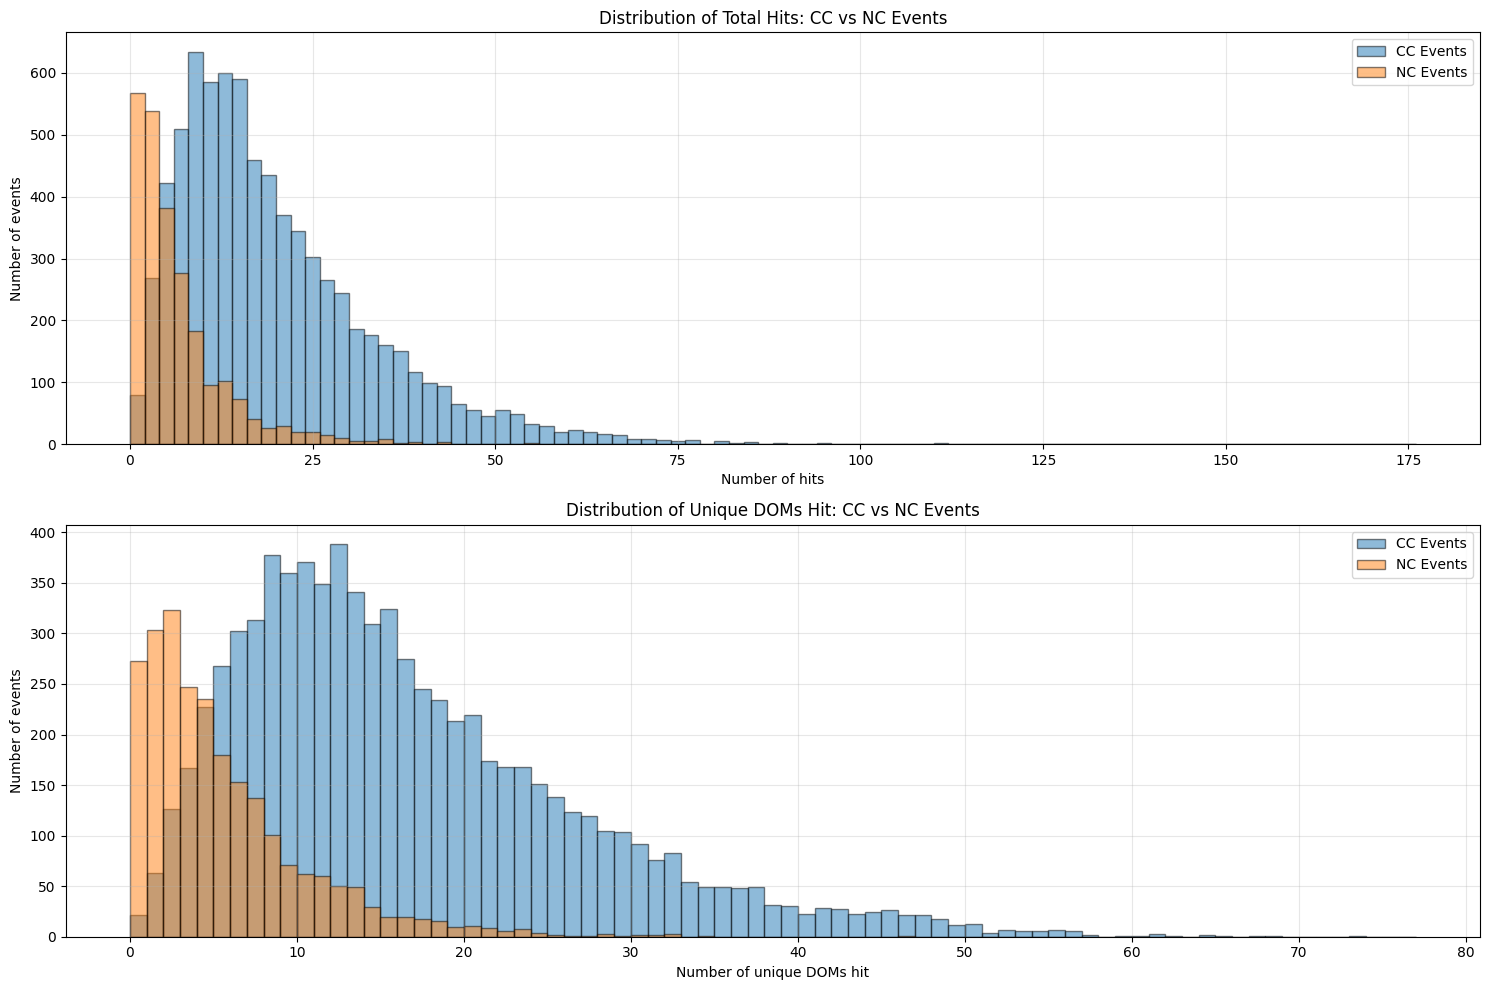

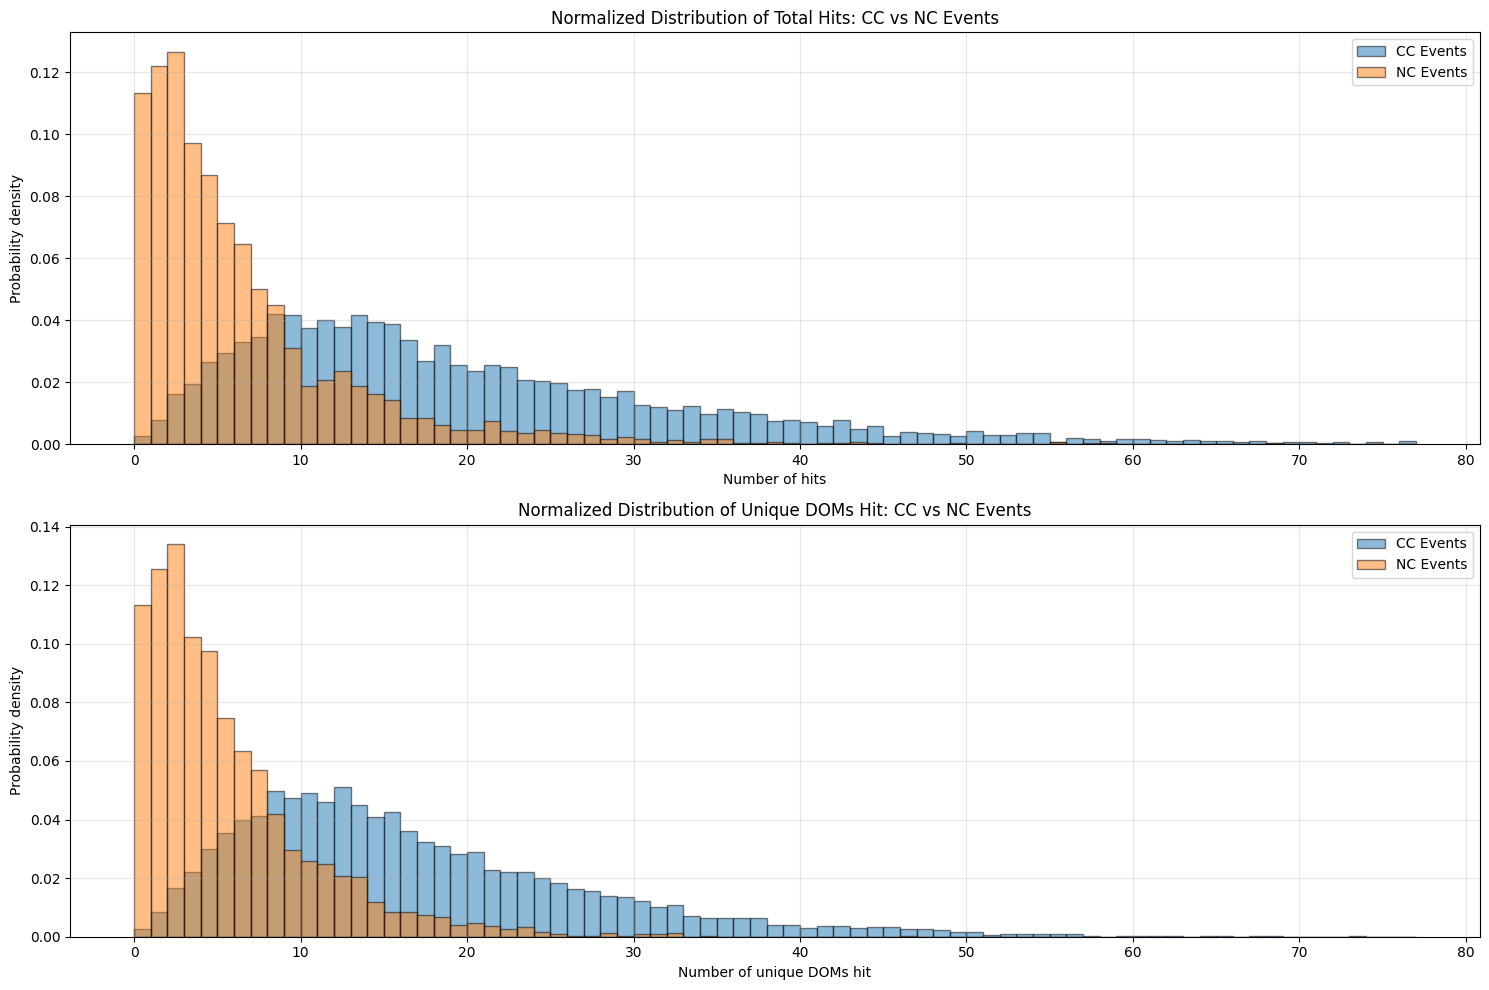

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays to store total hit counts for CC and NC events
cc_hits_per_event = np.zeros(len(cc_idx))
nc_hits_per_event = np.zeros(len(nc_idx))

# Arrays to store unique DOM hit counts
cc_unique_doms_per_event = np.zeros(len(cc_idx))
nc_unique_doms_per_event = np.zeros(len(nc_idx))

# Process CC events
for i, event_idx in enumerate(cc_idx):
    # Count total hits
    cc_hits_per_event[i] = len(tenk_no_agg_deepcore['photons'][event_idx]['t'])
    
    # Count unique DOMs hit
    string_ids = tenk_no_agg_deepcore['photons'][event_idx]['string_id']
    sensor_ids = tenk_no_agg_deepcore['photons'][event_idx]['sensor_id']
    cc_unique_doms_per_event[i] = len(set(zip(string_ids, sensor_ids)))

# Process NC events
for i, event_idx in enumerate(nc_idx):
    # Count total hits
    nc_hits_per_event[i] = len(tenk_no_agg_deepcore['photons'][event_idx]['t'])
    
    # Count unique DOMs hit
    string_ids = tenk_no_agg_deepcore['photons'][event_idx]['string_id']
    sensor_ids = tenk_no_agg_deepcore['photons'][event_idx]['sensor_id']
    nc_unique_doms_per_event[i] = len(set(zip(string_ids, sensor_ids)))

# Create histograms
plt.figure(figsize=(15, 10))

# Plot 1: Total hits distribution
plt.subplot(2, 1, 1)
max_hits = max(np.max(cc_hits_per_event), np.max(nc_hits_per_event))
bins = np.arange(0, max_hits + 10, 2)  # Adjust bin size as needed

plt.hist(cc_hits_per_event, bins=bins, alpha=0.5, label='CC Events', edgecolor='black')
plt.hist(nc_hits_per_event, bins=bins, alpha=0.5, label='NC Events', edgecolor='black')
plt.xlabel('Number of hits')
plt.ylabel('Number of events')
plt.title('Distribution of Total Hits: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Unique DOMs hit distribution
plt.subplot(2, 1, 2)
max_doms = max(np.max(cc_unique_doms_per_event), np.max(nc_unique_doms_per_event))
bins = np.arange(0, max_doms + 5, 1)  # Adjust bin size as needed

plt.hist(cc_unique_doms_per_event, bins=bins, alpha=0.5, label='CC Events', edgecolor='black')
plt.hist(nc_unique_doms_per_event, bins=bins, alpha=0.5, label='NC Events', edgecolor='black')
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Number of events')
plt.title('Distribution of Unique DOMs Hit: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

# Print some statistics
print(f"CC Events ({len(cc_idx)} events):")
print(f"  Mean hits: {np.mean(cc_hits_per_event):.2f}")
print(f"  Median hits: {np.median(cc_hits_per_event):.2f}")
print(f"  Mean unique DOMs: {np.mean(cc_unique_doms_per_event):.2f}")
print(f"  Median unique DOMs: {np.median(cc_unique_doms_per_event):.2f}")

print(f"\nNC Events ({len(nc_idx)} events):")
print(f"  Mean hits: {np.mean(nc_hits_per_event):.2f}")
print(f"  Median hits: {np.median(nc_hits_per_event):.2f}")
print(f"  Mean unique DOMs: {np.mean(nc_unique_doms_per_event):.2f}")
print(f"  Median unique DOMs: {np.median(nc_unique_doms_per_event):.2f}")

plt.tight_layout()
plt.show()

# Optional: If you want to make the histograms normalized for better comparison 
# when there are different numbers of CC and NC events
plt.figure(figsize=(15, 10))

# Plot 1: Normalized total hits distribution
plt.subplot(2, 1, 1)
plt.hist(cc_hits_per_event, bins=bins, alpha=0.5, label='CC Events', 
         edgecolor='black', density=True)
plt.hist(nc_hits_per_event, bins=bins, alpha=0.5, label='NC Events', 
         edgecolor='black', density=True)
plt.xlabel('Number of hits')
plt.ylabel('Probability density')
plt.title('Normalized Distribution of Total Hits: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Normalized unique DOMs hit distribution
plt.subplot(2, 1, 2)
plt.hist(cc_unique_doms_per_event, bins=bins, alpha=0.5, label='CC Events', 
         edgecolor='black', density=True)
plt.hist(nc_unique_doms_per_event, bins=bins, alpha=0.5, label='NC Events', 
         edgecolor='black', density=True)
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Probability density')
plt.title('Normalized Distribution of Unique DOMs Hit: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

CC Events (7588 events):
  Mean max distance: 233.11 m
  Median max distance: 221.50 m
  Max distance range: 0.00 to 901.77 m

NC Events (2412 events):
  Mean max distance: 119.62 m
  Median max distance: 125.54 m
  Max distance range: 0.00 to 760.65 m


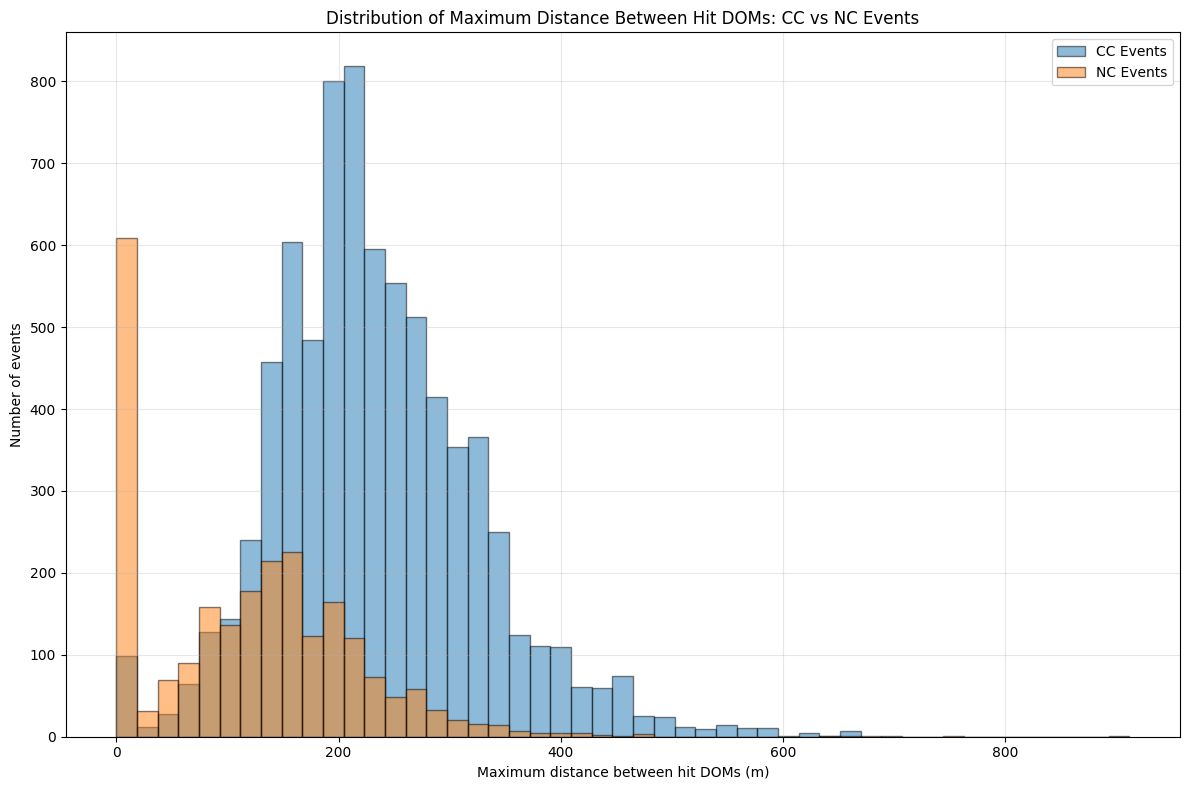

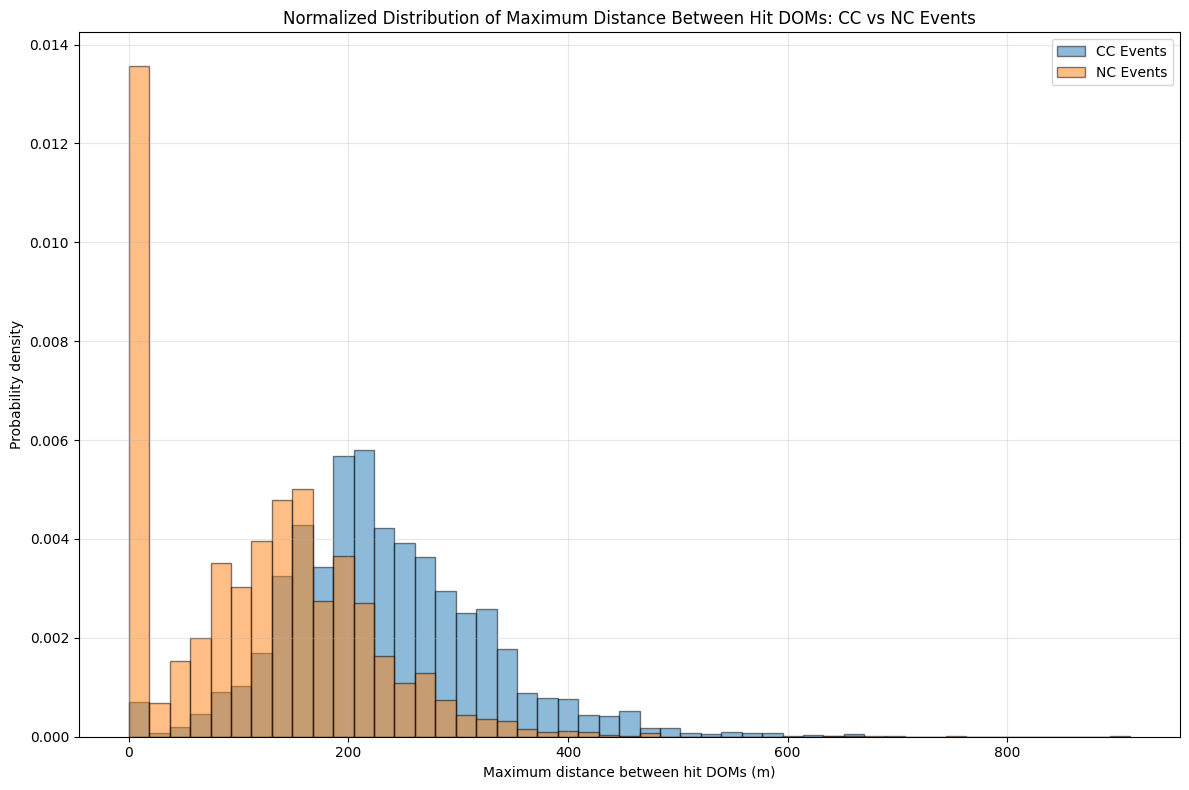

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Arrays to store maximum distances
cc_max_distances = np.zeros(len(cc_idx))
nc_max_distances = np.zeros(len(nc_idx))

# Process CC events
for i, event_idx in enumerate(cc_idx):
    # Get the positions of all hit DOMs
    x_pos = tenk_no_agg_deepcore['photons'][event_idx]['sensor_pos_x']
    y_pos = tenk_no_agg_deepcore['photons'][event_idx]['sensor_pos_y']
    z_pos = tenk_no_agg_deepcore['photons'][event_idx]['sensor_pos_z']
    
    # Stack the coordinates to create a position array
    positions = np.vstack((x_pos, y_pos, z_pos)).T
    
    # If there's only one hit, the max distance is 0
    if len(positions) <= 1:
        cc_max_distances[i] = 0
        continue
    
    # Calculate pairwise distances between all hit DOMs
    # pdist computes efficiently without computing the full matrix
    distances = pdist(positions)
    
    # Get the maximum distance
    cc_max_distances[i] = np.max(distances)

# Process NC events
for i, event_idx in enumerate(nc_idx):
    # Get the positions of all hit DOMs
    x_pos = tenk_no_agg_deepcore['photons'][event_idx]['sensor_pos_x']
    y_pos = tenk_no_agg_deepcore['photons'][event_idx]['sensor_pos_y']
    z_pos = tenk_no_agg_deepcore['photons'][event_idx]['sensor_pos_z']
    
    # Stack the coordinates to create a position array
    positions = np.vstack((x_pos, y_pos, z_pos)).T
    
    # If there's only one hit, the max distance is 0
    if len(positions) <= 1:
        nc_max_distances[i] = 0
        continue
    
    # Calculate pairwise distances between all hit DOMs
    distances = pdist(positions)
    
    # Get the maximum distance
    nc_max_distances[i] = np.max(distances)

# Create histogram
plt.figure(figsize=(12, 8))

# Determine an appropriate bin range
max_dist = max(np.max(cc_max_distances), np.max(nc_max_distances))
bins = np.linspace(0, max_dist + 10, 50)  # 50 bins from 0 to max distance

plt.hist(cc_max_distances, bins=bins, alpha=0.5, label='CC Events', edgecolor='black')
plt.hist(nc_max_distances, bins=bins, alpha=0.5, label='NC Events', edgecolor='black')

plt.xlabel('Maximum distance between hit DOMs (m)')
plt.ylabel('Number of events')
plt.title('Distribution of Maximum Distance Between Hit DOMs: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

# Print statistics
print(f"CC Events ({len(cc_idx)} events):")
print(f"  Mean max distance: {np.mean(cc_max_distances):.2f} m")
print(f"  Median max distance: {np.median(cc_max_distances):.2f} m")
print(f"  Max distance range: {np.min(cc_max_distances):.2f} to {np.max(cc_max_distances):.2f} m")

print(f"\nNC Events ({len(nc_idx)} events):")
print(f"  Mean max distance: {np.mean(nc_max_distances):.2f} m")
print(f"  Median max distance: {np.median(nc_max_distances):.2f} m")
print(f"  Max distance range: {np.min(nc_max_distances):.2f} to {np.max(nc_max_distances):.2f} m")

plt.tight_layout()
plt.show()

# Optional: Create normalized histograms for better comparison
plt.figure(figsize=(12, 8))
plt.hist(cc_max_distances, bins=bins, alpha=0.5, label='CC Events', 
         edgecolor='black', density=True)
plt.hist(nc_max_distances, bins=bins, alpha=0.5, label='NC Events', 
         edgecolor='black', density=True)

plt.xlabel('Maximum distance between hit DOMs (m)')
plt.ylabel('Probability density')
plt.title('Normalized Distribution of Maximum Distance Between Hit DOMs: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns


Extracting features...
Feature matrix shape: (10000, 30)
Label vector shape: (10000,)
Number of CC events: 7588
Number of NC events: 2412
Training BDT classifier...

Model Evaluation:
Accuracy: 0.8460


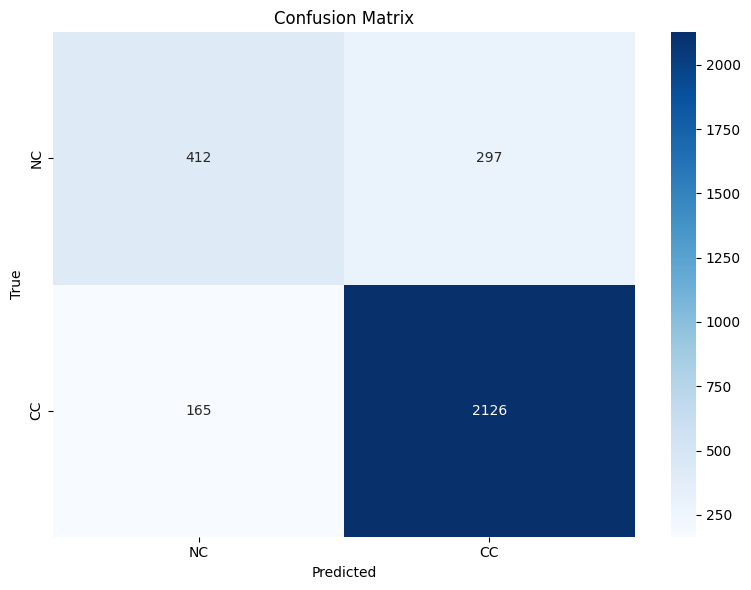


Classification Report:
              precision    recall  f1-score   support

          NC       0.71      0.58      0.64       709
          CC       0.88      0.93      0.90      2291

    accuracy                           0.85      3000
   macro avg       0.80      0.75      0.77      3000
weighted avg       0.84      0.85      0.84      3000



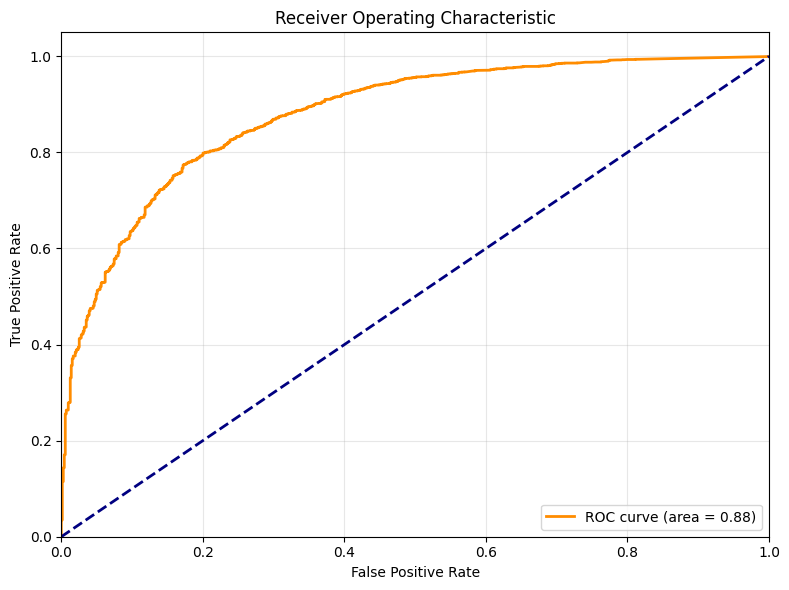

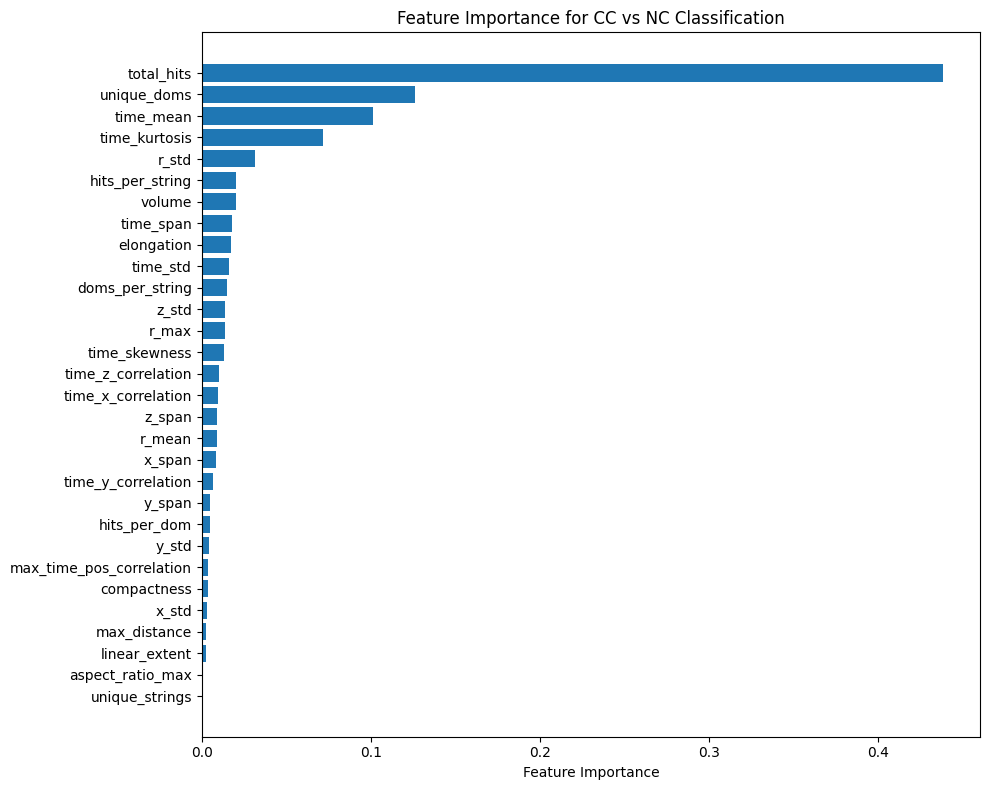


Feature Importances:
total_hits: 0.4384
unique_doms: 0.1262
hits_per_dom: 0.0049
max_distance: 0.0026
time_span: 0.0179
time_mean: 0.1015
time_std: 0.0159
time_kurtosis: 0.0716
time_skewness: 0.0129
x_span: 0.0082
y_span: 0.0049
z_span: 0.0089
x_std: 0.0034
y_std: 0.0045
z_std: 0.0137
elongation: 0.0173
aspect_ratio_max: 0.0010
volume: 0.0203
linear_extent: 0.0024
compactness: 0.0036
r_mean: 0.0087
r_std: 0.0317
r_max: 0.0137
unique_strings: 0.0005
hits_per_string: 0.0204
doms_per_string: 0.0147
time_z_correlation: 0.0102
time_x_correlation: 0.0096
time_y_correlation: 0.0067
max_time_pos_correlation: 0.0037


In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Prepare feature extraction - NO CHEATING VERSION
def extract_features(event_idx, data):
    """Extract features from a single event without using truth information"""
    features = {}
    
    # Get photon data for this event
    photons = data['photons'][event_idx]
    
    # Basic hit count features
    features['total_hits'] = len(photons['t'])
    
    # Unique DOMs hit
    unique_doms = len(set(zip(photons['string_id'], photons['sensor_id'])))
    features['unique_doms'] = unique_doms
    
    # Ratio of hits to unique DOMs (multiple hits per DOM suggests cascade-like event)
    features['hits_per_dom'] = features['total_hits'] / max(1, unique_doms)
    
    # Maximum distance between hit DOMs
    if len(photons['sensor_pos_x']) > 1:
        positions = np.vstack((photons['sensor_pos_x'], 
                             photons['sensor_pos_y'], 
                             photons['sensor_pos_z'])).T
        max_distance = np.max(pdist(positions))
    else:
        max_distance = 0
    features['max_distance'] = max_distance
    
    # Time-related features
    if len(photons['t']) > 0:
        times = photons['t']
        features['time_span'] = np.max(times) - np.min(times)
        features['time_mean'] = np.mean(times)
        features['time_std'] = np.std(times)
        
        # Time distribution metrics (can help identify track-like vs cascade-like patterns)
        if len(times) > 5:  # Only if we have enough hits
            features['time_kurtosis'] = ((times - np.mean(times))**4).mean() / ((times - np.mean(times))**2).mean()**2
            features['time_skewness'] = ((times - np.mean(times))**3).mean() / ((times - np.mean(times))**2).mean()**1.5
        else:
            features['time_kurtosis'] = 0
            features['time_skewness'] = 0
    else:
        features['time_span'] = 0
        features['time_mean'] = 0
        features['time_std'] = 0
        features['time_kurtosis'] = 0
        features['time_skewness'] = 0
    
    # Spatial distribution features
    if len(photons['sensor_pos_x']) > 1:
        # Basic spatial extents
        features['x_span'] = np.max(photons['sensor_pos_x']) - np.min(photons['sensor_pos_x'])
        features['y_span'] = np.max(photons['sensor_pos_y']) - np.min(photons['sensor_pos_y'])
        features['z_span'] = np.max(photons['sensor_pos_z']) - np.min(photons['sensor_pos_z'])
        features['x_std'] = np.std(photons['sensor_pos_x'])
        features['y_std'] = np.std(photons['sensor_pos_y'])
        features['z_std'] = np.std(photons['sensor_pos_z'])
        
        # Track-like metrics: elongation measures
        spatial_std = np.array([features['x_std'], features['y_std'], features['z_std']])
        features['elongation'] = np.max(spatial_std) / (np.mean(spatial_std) + 1e-10)
        
        # Aspect ratios
        span_array = np.array([features['x_span'], features['y_span'], features['z_span']])
        features['aspect_ratio_max'] = np.max(span_array) / (np.min(span_array) + 1e-10)
        
        # Volume vs Linear spread
        features['volume'] = features['x_span'] * features['y_span'] * features['z_span']
        features['linear_extent'] = np.sqrt(features['x_span']**2 + features['y_span']**2 + features['z_span']**2)
        features['compactness'] = features['volume'] / (features['linear_extent']**3 + 1e-10)
        
        # Spatial dispersion metrics 
        center_x = np.mean(photons['sensor_pos_x'])
        center_y = np.mean(photons['sensor_pos_y'])
        center_z = np.mean(photons['sensor_pos_z'])
        
        r_squared = (photons['sensor_pos_x'] - center_x)**2 + \
                    (photons['sensor_pos_y'] - center_y)**2 + \
                    (photons['sensor_pos_z'] - center_z)**2
        
        features['r_mean'] = np.mean(np.sqrt(r_squared))
        features['r_std'] = np.std(np.sqrt(r_squared))
        features['r_max'] = np.max(np.sqrt(r_squared))
        
        # Topology features (string patterns)
        unique_strings = len(np.unique(photons['string_id']))
        features['unique_strings'] = unique_strings
        features['hits_per_string'] = features['total_hits'] / max(1, unique_strings)
        features['doms_per_string'] = unique_doms / max(1, unique_strings)
    else:
        # Fill in defaults if only one hit
        features['x_span'] = 0
        features['y_span'] = 0
        features['z_span'] = 0
        features['x_std'] = 0
        features['y_std'] = 0
        features['z_std'] = 0
        features['elongation'] = 0
        features['aspect_ratio_max'] = 0
        features['volume'] = 0
        features['linear_extent'] = 0
        features['compactness'] = 0
        features['r_mean'] = 0
        features['r_std'] = 0
        features['r_max'] = 0
        features['unique_strings'] = 0
        features['hits_per_string'] = 0
        features['doms_per_string'] = 0
    
    # Advanced timing-space correlations
    if len(photons['t']) > 5:
        # Try to detect if there's a coherent track-like motion
        # Simplified track fit: look for correlation between z position and time
        z_pos = photons['sensor_pos_z']
        t_pos = photons['t']
        
        # Normalization to avoid numerical issues
        z_norm = (z_pos - np.mean(z_pos)) / (np.std(z_pos) + 1e-10)
        t_norm = (t_pos - np.mean(t_pos)) / (np.std(t_pos) + 1e-10)
        
        # Correlation coefficient
        corr_zt = np.mean(z_norm * t_norm)
        features['time_z_correlation'] = corr_zt
        
        # Similar for x and y
        x_norm = (photons['sensor_pos_x'] - np.mean(photons['sensor_pos_x'])) / (np.std(photons['sensor_pos_x']) + 1e-10)
        y_norm = (photons['sensor_pos_y'] - np.mean(photons['sensor_pos_y'])) / (np.std(photons['sensor_pos_y']) + 1e-10)
        
        features['time_x_correlation'] = np.mean(x_norm * t_norm)
        features['time_y_correlation'] = np.mean(y_norm * t_norm)
        
        # Maximum absolute correlation (could be in any direction)
        features['max_time_pos_correlation'] = max(
            abs(features['time_x_correlation']),
            abs(features['time_y_correlation']),
            abs(features['time_z_correlation'])
        )
    else:
        features['time_z_correlation'] = 0
        features['time_x_correlation'] = 0
        features['time_y_correlation'] = 0
        features['max_time_pos_correlation'] = 0
        
    return features

# Extract features for all events
print("Extracting features...")
all_features = []
all_labels = []  # 1 for CC, 0 for NC

# Process CC events
for event_idx in cc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(1)  # CC event

# Process NC events
for event_idx in nc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(0)  # NC event

# Convert to numpy arrays
X = np.array(all_features)
y = np.array(all_labels)

# Get feature names for later use
feature_names = list(features.keys())

# Print dataset info
print(f"Feature matrix shape: {X.shape}")
print(f"Label vector shape: {y.shape}")
print(f"Number of CC events: {np.sum(y == 1)}")
print(f"Number of NC events: {np.sum(y == 0)}")

# Check for NaN values
if np.isnan(X).any():
    print("Warning: NaN values detected in features! Replacing with zeros.")
    X = np.nan_to_num(X)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the BDT classifier
print("Training BDT classifier...")
bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    random_state=42
)

bdt.fit(X_train, y_train)

# Make predictions
y_pred = bdt.predict(X_test)
y_pred_proba = bdt.predict_proba(X_test)[:, 1]  # Probability of being CC (class 1)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['NC', 'CC'], yticklabels=['NC', 'CC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NC', 'CC']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()

# Feature Importance
feature_importance = bdt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for CC vs NC Classification')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Print feature importances
print("\nFeature Importances:")
for i, importance in enumerate(feature_importance):
    print(f"{feature_names[i]}: {importance:.4f}")

Extracting features...
Feature matrix shape: (10000, 30)
Label vector shape: (10000,)
Number of CC events: 7588
Number of NC events: 2412
Training BDT classifier...

Model Evaluation:
Accuracy: 0.8460

Classification Report:
              precision    recall  f1-score   support

          NC       0.71      0.58      0.64       709
          CC       0.88      0.93      0.90      2291

    accuracy                           0.85      3000
   macro avg       0.80      0.75      0.77      3000
weighted avg       0.84      0.85      0.84      3000



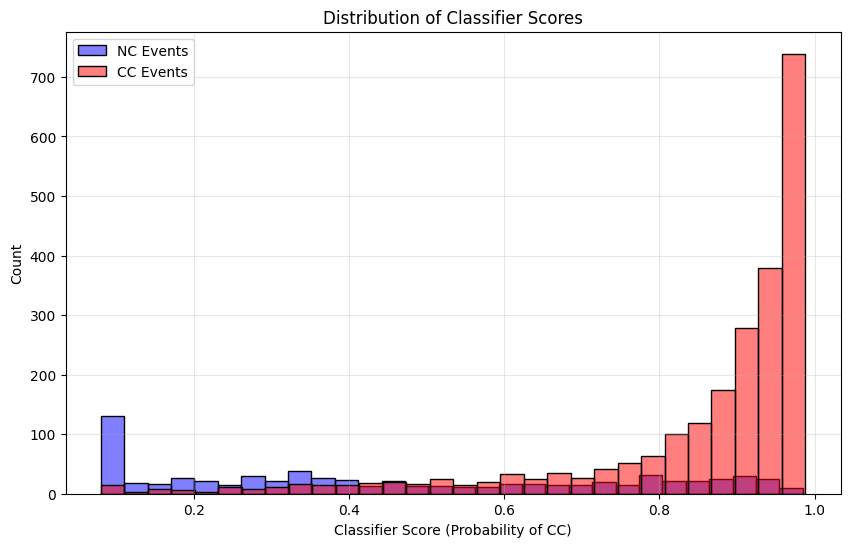


Optimal classification threshold: 0.8141
At this threshold - TPR: 0.7739, FPR: 0.1721


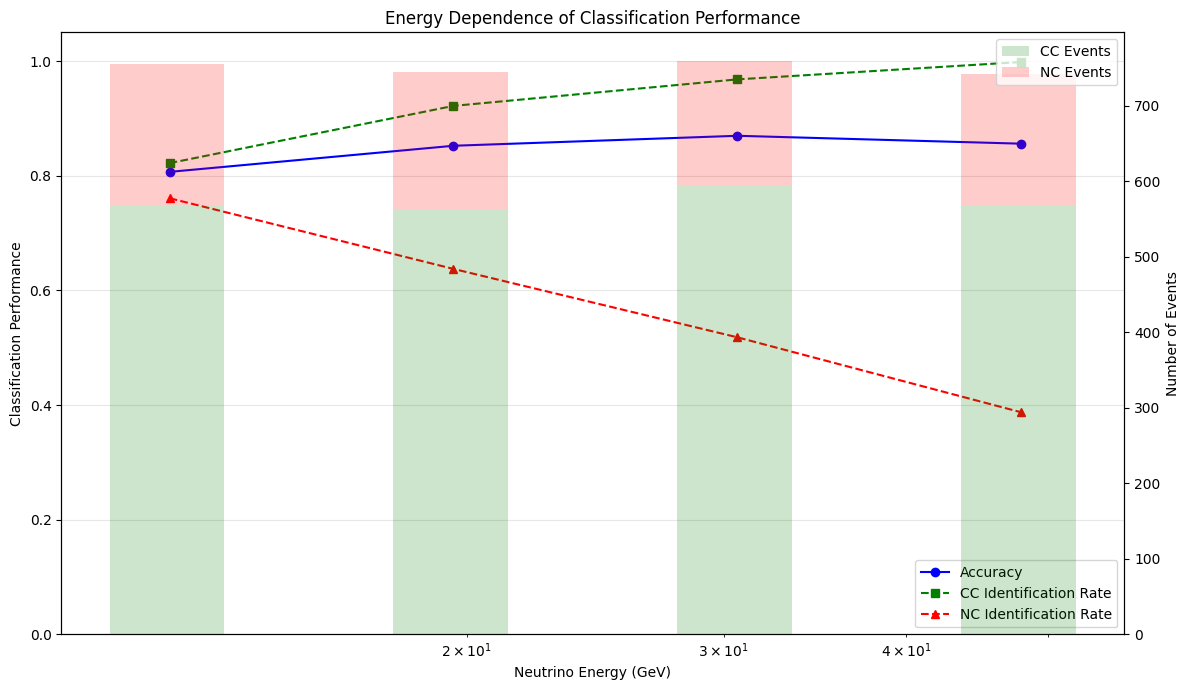

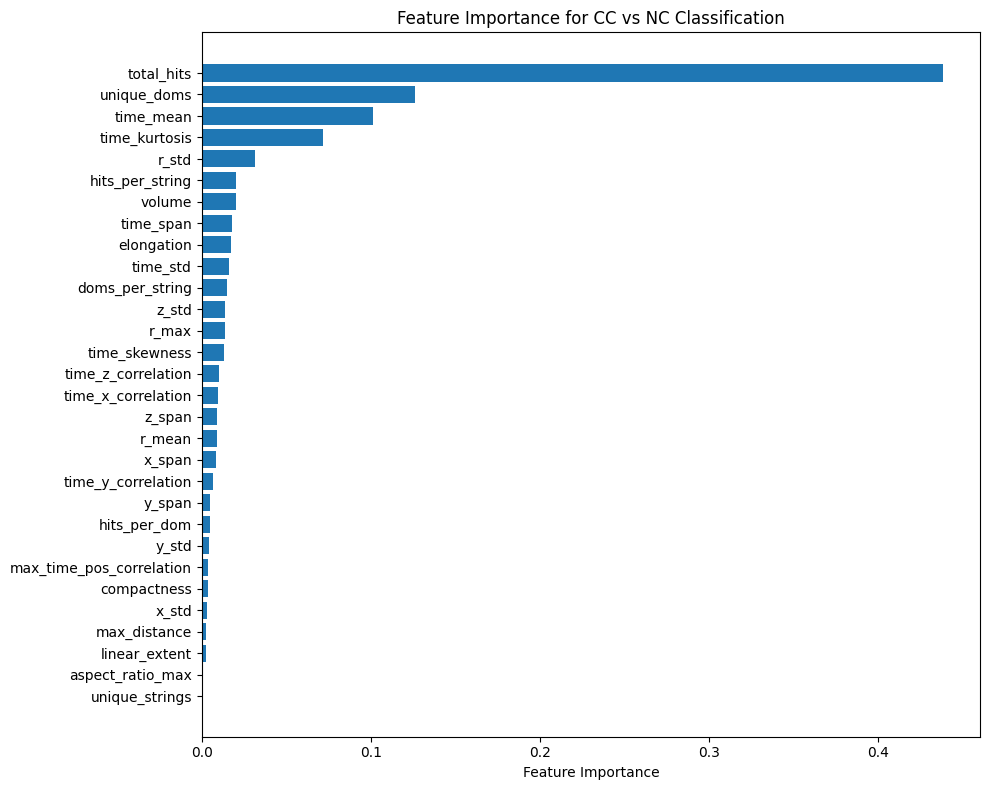

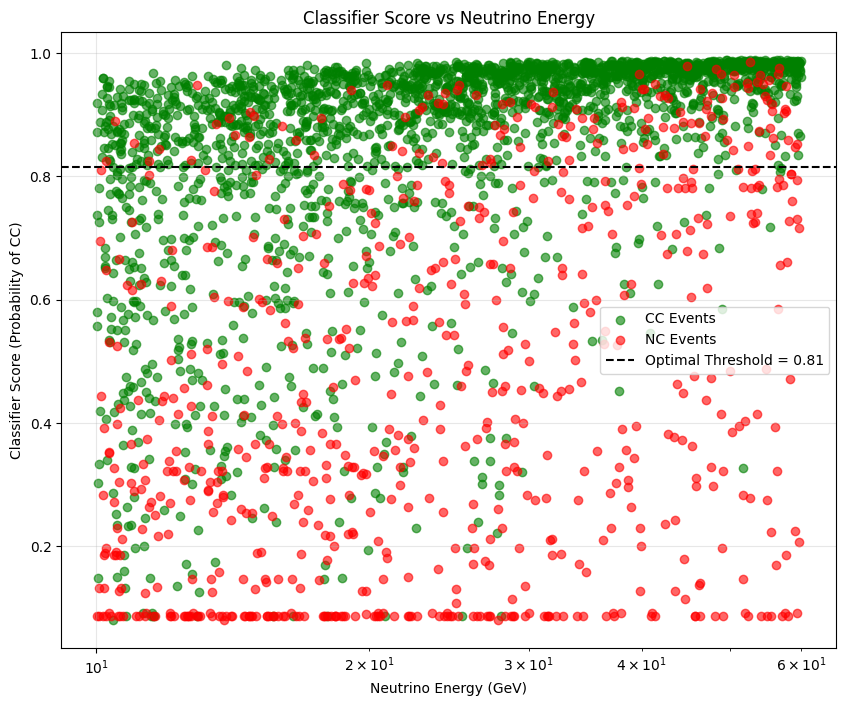

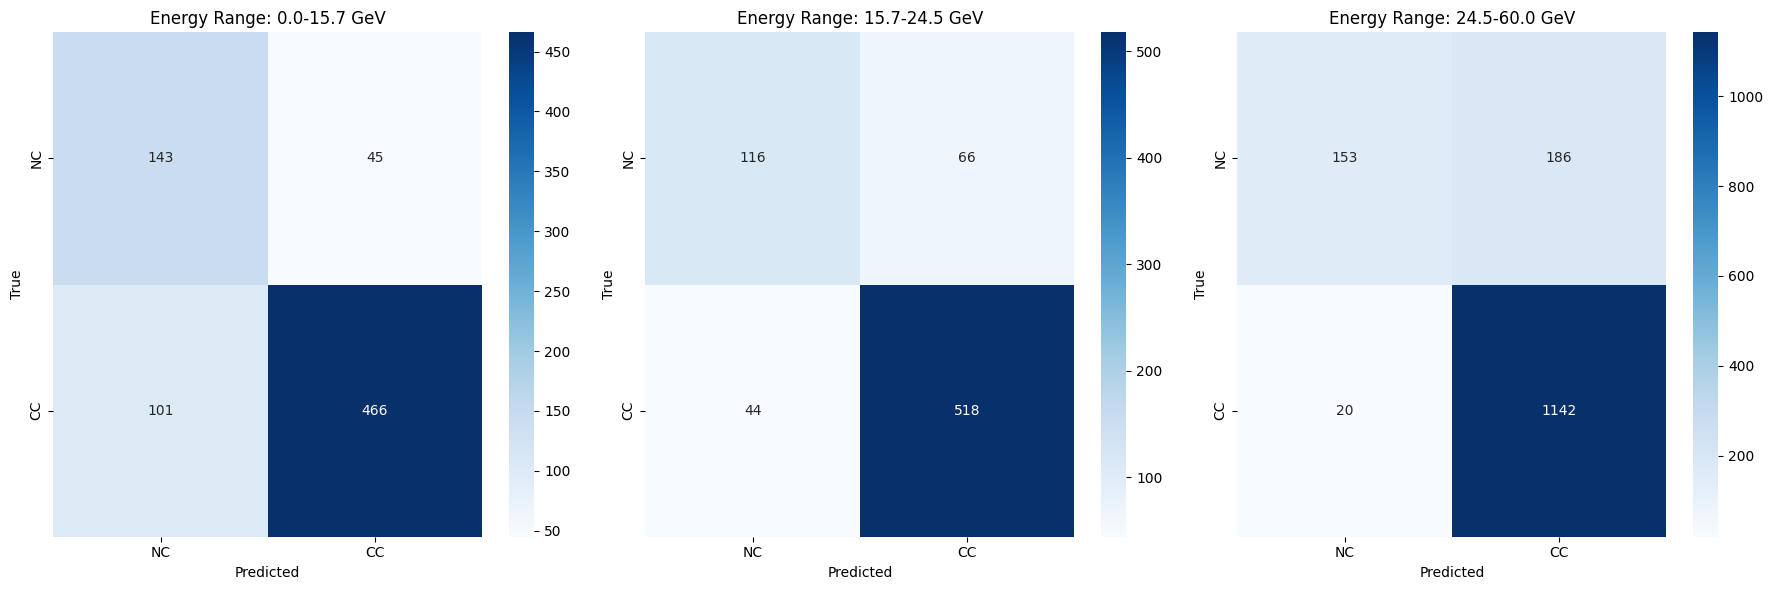

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Feature extraction function remains the same as in the previous code
# [Insert the extract_features function from the previous reply]

# Extract features for all events
print("Extracting features...")
all_features = []
all_labels = []
all_energies = []  # Store energy for energy dependence analysis

# Process CC events
for event_idx in cc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(1)  # CC event
    
    # Get primary neutrino energy
    energy = tenk_no_agg_deepcore['mc_truth'][event_idx]['initial_state_energy']
    all_energies.append(energy)

# Process NC events
for event_idx in nc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(0)  # NC event
    
    # Get primary neutrino energy
    energy = tenk_no_agg_deepcore['mc_truth'][event_idx]['initial_state_energy']
    all_energies.append(energy)

# Convert to numpy arrays
X = np.array(all_features)
y = np.array(all_labels)
energies = np.array(all_energies)

# Get feature names for later use
feature_names = list(features.keys())

# Print dataset info
print(f"Feature matrix shape: {X.shape}")
print(f"Label vector shape: {y.shape}")
print(f"Number of CC events: {np.sum(y == 1)}")
print(f"Number of NC events: {np.sum(y == 0)}")

# Check for NaN values
if np.isnan(X).any():
    print("Warning: NaN values detected in features! Replacing with zeros.")
    X = np.nan_to_num(X)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets - keep track of energies too
X_train, X_test, y_train, y_test, energy_train, energy_test = train_test_split(
    X_scaled, y, energies, test_size=0.3, random_state=42)

# Initialize and train the BDT classifier
print("Training BDT classifier...")
bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    random_state=42
)

bdt.fit(X_train, y_train)

# Make predictions
y_pred = bdt.predict(X_test)
y_score = bdt.predict_proba(X_test)[:, 1]  # Probability of being CC (class 1)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NC', 'CC']))

# PART 1: LOGIT SCORE ANALYSIS
# ============================

# Plotting the distribution of classifier scores for both classes
plt.figure(figsize=(10, 6))
sns.histplot(y_score[y_test == 0], bins=30, alpha=0.5, label='NC Events', color='blue')
sns.histplot(y_score[y_test == 1], bins=30, alpha=0.5, label='CC Events', color='red')
plt.xlabel('Classifier Score (Probability of CC)')
plt.ylabel('Count')
plt.title('Distribution of Classifier Scores')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('classifier_score_distribution.png')
plt.show()

# Find optimal threshold - J statistic (Youden's J = TPR - FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal classification threshold: {optimal_threshold:.4f}")
print(f"At this threshold - TPR: {tpr[optimal_idx]:.4f}, FPR: {fpr[optimal_idx]:.4f}")

# PART 2: ENERGY DEPENDENCE ANALYSIS
# ==================================

# Create energy bins
energy_min = np.min(energy_test)
energy_max = np.max(energy_test)
energy_bins = np.logspace(np.log10(max(1, energy_min)), np.log10(energy_max), 5)

# Initialize arrays for energy-dependent metrics
bin_accuracies = []
bin_centers = []
bin_cc_counts = []
bin_nc_counts = []
bin_tpr = []  # True positive rate (CC identification)
bin_tnr = []  # True negative rate (NC identification)

# For each energy bin, compute classification metrics
for i in range(len(energy_bins)-1):
    # Find events in this energy bin
    mask = (energy_test >= energy_bins[i]) & (energy_test < energy_bins[i+1])
    
    if np.sum(mask) < 5:  # Skip if too few events
        continue
    
    # Calculate metrics for this bin
    bin_accuracy = accuracy_score(y_test[mask], y_pred[mask])
    bin_accuracies.append(bin_accuracy)
    bin_centers.append(np.sqrt(energy_bins[i] * energy_bins[i+1]))
    
    # Count CC and NC events in this bin
    bin_cc_count = np.sum(y_test[mask] == 1)
    bin_nc_count = np.sum(y_test[mask] == 0)
    bin_cc_counts.append(bin_cc_count)
    bin_nc_counts.append(bin_nc_count)
    
    # TPR and TNR for this bin
    if bin_cc_count > 0:
        tpr_bin = np.sum((y_pred[mask] == 1) & (y_test[mask] == 1)) / bin_cc_count
        bin_tpr.append(tpr_bin)
    else:
        bin_tpr.append(0)
        
    if bin_nc_count > 0:
        tnr_bin = np.sum((y_pred[mask] == 0) & (y_test[mask] == 0)) / bin_nc_count
        bin_tnr.append(tnr_bin)
    else:
        bin_tnr.append(0)

# Plot energy-dependent classification performance
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot accuracy vs energy
ax1.plot(bin_centers, bin_accuracies, 'o-', color='blue', label='Accuracy')
ax1.plot(bin_centers, bin_tpr, 's--', color='green', label='CC Identification Rate')
ax1.plot(bin_centers, bin_tnr, '^--', color='red', label='NC Identification Rate')
ax1.set_xscale('log')
ax1.set_xlabel('Neutrino Energy (GeV)')
ax1.set_ylabel('Classification Performance')
ax1.set_ylim(0, 1.05)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Add secondary y-axis for event counts
ax2 = ax1.twinx()
ax2.bar(bin_centers, bin_cc_counts, alpha=0.2, width=np.diff(energy_bins)*0.4, label='CC Events', color='green')
ax2.bar(bin_centers, bin_nc_counts, alpha=0.2, width=np.diff(energy_bins)*0.4, label='NC Events', color='red', bottom=bin_cc_counts)
ax2.set_ylabel('Number of Events')
ax2.legend(loc='upper right')

plt.title('Energy Dependence of Classification Performance')
plt.tight_layout()
plt.savefig('energy_dependence.png')
plt.show()

# PART 3: FEATURE IMPORTANCE
# =========================

# Feature Importance (same as before)
feature_importance = bdt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for CC vs NC Classification')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# PART 4: ENERGY VS CLASSIFIER SCORE SCATTER PLOT
# ==============================================

# Create scatter plot of energy vs classifier score
plt.figure(figsize=(10, 8))
cc_mask = y_test == 1
nc_mask = y_test == 0

plt.scatter(energy_test[cc_mask], y_score[cc_mask], alpha=0.6, label='CC Events', c='green')
plt.scatter(energy_test[nc_mask], y_score[nc_mask], alpha=0.6, label='NC Events', c='red')

plt.axhline(y=optimal_threshold, color='black', linestyle='--', 
           label=f'Optimal Threshold = {optimal_threshold:.2f}')

plt.xscale('log')
plt.xlabel('Neutrino Energy (GeV)')
plt.ylabel('Classifier Score (Probability of CC)')
plt.title('Classifier Score vs Neutrino Energy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('score_vs_energy.png')
plt.show()

# PART 5: CONFUSION MATRICES BY ENERGY RANGE
# =========================================

# Create confusion matrices for different energy ranges
energy_ranges = [
    (0, energy_bins[1]),  # Low energy
    (energy_bins[1], energy_bins[2]),  # Medium-low energy
    (energy_bins[2], energy_bins[-1])  # High energy
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (e_min, e_max) in enumerate(energy_ranges):
    # Filter events in this energy range
    mask = (energy_test >= e_min) & (energy_test < e_max)
    
    if np.sum(mask) < 5:  # Skip if too few events
        continue
    
    # Create confusion matrix
    cm = confusion_matrix(y_test[mask], y_pred[mask])
    
    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['NC', 'CC'], yticklabels=['NC', 'CC'])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].set_title(f'Energy Range: {e_min:.1f}-{e_max:.1f} GeV')

plt.tight_layout()
plt.savefig('confusion_matrices_by_energy.png')
plt.show()

In [119]:
tenk_no_agg_deepcore['mc_truth'][0]

{'interaction': 1,
 'initial_state_energy': 52.61086554311111,
 'initial_state_type': 14,
 'initial_state_zenith': 1.3353813115519426,
 'initial_state_azimuth': 2.794474113385256,
 'initial_state_x': 67.90705617524635,
 'initial_state_y': -113.5883240248067,
 'initial_state_z': -2109.086014378569,
 'final_state_energy': array([4.55051801e+01, 3.29933062e-02, 3.99437638e-02, 3.27213044e-02,
        4.08309359e+00, 1.09807943e+00, 9.88114394e-01, 1.51005869e+00,
        4.33928096e-01, 1.23503895e+00, 1.01236585e+00, 2.92767458e-01,
        2.08485134e-01]),
 'final_state_type': array([  13.,   11.,   14.,  -12.,  111., 2112., 2112.,  211.,  111.,
        2112., 2212.,  211., -211.]),
 'final_state_zenith': array([1.31974722, 1.96610636, 2.08156079, 0.17345649, 1.38360638,
        0.69370798, 3.00842721, 1.50117357, 2.4246174 , 1.33226107,
        1.38235841, 1.15191609, 2.0649361 ]),
 'final_state_azimuth': array([ 2.77934394,  1.69948794, -1.33338972,  2.43300703,  2.76700981,
        